# Alex NLP Project

# Useful
* https://stackabuse.com/python-for-nlp-working-with-text-and-pdf-files/
* https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63
* https://www.datacamp.com/community/tutorials/simplifying-sentiment-analysis-python
* https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk
* https://machinelearningmastery.com/clean-text-machine-learning-python/

In [1]:
import docx2txt
from collections import Counter

In [2]:

## Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

import regex as re
import spacy
import nltk
import string

In [3]:
# Import the libraries we need
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [4]:
from csv import reader
from wordcloud import WordCloud, STOPWORDS 

In [5]:
import seaborn as sns

# Word Document

In [6]:
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Anybody up for.docx')
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/1A. The Aqueduct of Segovia.docx')
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/ROMANCING1.docx')
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/Pride and Prejudice.docx')
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/Alice Adventures.docx')
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/ClimateArticle_Published_corr.docx')
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/FourCollidingCouples_210119.docx')
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/The witness.docx')
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/The witness - badspelling.docx')
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/Treasure Island.docx')


my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/holybible.docx')

#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/Pitch Deck v08 A4.docx')
#my_text = docx2txt.process ('C:/Users/alexd/Alex Folder 1/NLP Project1/Data/Data Scientist - Collaboration.docx')








In [7]:
print(type(my_text))

<class 'str'>


In [8]:
#print(my_text)

In [9]:
# create a bar chart of the frequency of the words in the text
def plot_words(tokens, top = 30):
    tokens_counter = Counter(tokens)
    tok = [t for (t, _) in tokens_counter.most_common()]
    val = [v for (_, v) in tokens_counter.most_common()]

    plt.figure(figsize = (16, 6))
    plt.bar(tok[:top], val[:top])
    plt.title('Number of terms: %d' % len(tokens_counter))
    plt.xticks(rotation = 90)

    plt.show()

# from Jason

In [10]:
words = my_text.split()

In [11]:
len(words)

821184

In [12]:
print(words[:100])

['The', 'Revelation', 'of', 'John', 'The', 'General', 'Epistle', 'of', 'Jude', 'The', 'Second', 'Epistle', 'General', 'of', 'John', 'The', 'Third', 'Epistle', 'General', 'of', 'John', 'The', 'First', 'Epistle', 'General', 'of', 'John', 'The', 'Second', 'Epistle', 'General', 'of', 'Peter', 'The', 'Second', 'Epistle', 'of', 'Paul', 'to', 'the', 'Thessalonians', 'The', 'First', 'Epistle', 'of', 'Paul', 'the', 'Apostle', 'to', 'Timothy', 'The', 'First', 'Epistle', 'of', 'Paul', 'the', 'Apostle', 'to', 'the', 'Thessalonians', 'The', 'Epistle', 'of', 'Paul', 'the', 'Apostle', 'to', 'the', 'Colossians', 'The', 'Epistle', 'of', 'Paul', 'the', 'Apostle', 'to', 'the', 'Ephesians', 'The', 'Second', 'Epistle', 'of', 'Paul', 'the', 'Apostle', 'to', 'Timothy', 'The', 'General', 'Epistle', 'of', 'James', 'The', 'First', 'Epistle', 'General', 'of', 'Peter', 'The', 'Epistle']


In [13]:
words2 = re.split(r'\W+', my_text)


In [14]:
print(words2[:100])

['The', 'Revelation', 'of', 'John', 'The', 'General', 'Epistle', 'of', 'Jude', 'The', 'Second', 'Epistle', 'General', 'of', 'John', 'The', 'Third', 'Epistle', 'General', 'of', 'John', 'The', 'First', 'Epistle', 'General', 'of', 'John', 'The', 'Second', 'Epistle', 'General', 'of', 'Peter', 'The', 'Second', 'Epistle', 'of', 'Paul', 'to', 'the', 'Thessalonians', 'The', 'First', 'Epistle', 'of', 'Paul', 'the', 'Apostle', 'to', 'Timothy', 'The', 'First', 'Epistle', 'of', 'Paul', 'the', 'Apostle', 'to', 'the', 'Thessalonians', 'The', 'Epistle', 'of', 'Paul', 'the', 'Apostle', 'to', 'the', 'Colossians', 'The', 'Epistle', 'of', 'Paul', 'the', 'Apostle', 'to', 'the', 'Ephesians', 'The', 'Second', 'Epistle', 'of', 'Paul', 'the', 'Apostle', 'to', 'Timothy', 'The', 'General', 'Epistle', 'of', 'James', 'The', 'First', 'Epistle', 'General', 'of', 'Peter', 'The', 'Epistle']


In [15]:
print(string.punctuation)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [16]:
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in words]

In [17]:
re_punc = re.compile('[%s]' % re.escape(string.punctuation))


In [18]:
stripped = [re_punc.sub('', w) for w in words]


In [19]:
print(stripped[:100])


['The', 'Revelation', 'of', 'John', 'The', 'General', 'Epistle', 'of', 'Jude', 'The', 'Second', 'Epistle', 'General', 'of', 'John', 'The', 'Third', 'Epistle', 'General', 'of', 'John', 'The', 'First', 'Epistle', 'General', 'of', 'John', 'The', 'Second', 'Epistle', 'General', 'of', 'Peter', 'The', 'Second', 'Epistle', 'of', 'Paul', 'to', 'the', 'Thessalonians', 'The', 'First', 'Epistle', 'of', 'Paul', 'the', 'Apostle', 'to', 'Timothy', 'The', 'First', 'Epistle', 'of', 'Paul', 'the', 'Apostle', 'to', 'the', 'Thessalonians', 'The', 'Epistle', 'of', 'Paul', 'the', 'Apostle', 'to', 'the', 'Colossians', 'The', 'Epistle', 'of', 'Paul', 'the', 'Apostle', 'to', 'the', 'Ephesians', 'The', 'Second', 'Epistle', 'of', 'Paul', 'the', 'Apostle', 'to', 'Timothy', 'The', 'General', 'Epistle', 'of', 'James', 'The', 'First', 'Epistle', 'General', 'of', 'Peter', 'The', 'Epistle']


In [20]:
table = str.maketrans('', '', string.punctuation)

In [21]:
print(table)

{33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 58: None, 59: None, 60: None, 61: None, 62: None, 63: None, 64: None, 91: None, 92: None, 93: None, 94: None, 95: None, 96: None, 123: None, 124: None, 125: None, 126: None}


In [22]:
from pandas import DataFrame

In [23]:
print(type(stripped))

<class 'list'>


In [24]:
stripped_df = DataFrame (stripped,columns=['Words'])

In [25]:
stripped_df.shape  ## Good

(821184, 1)

In [26]:
stripped_df.nunique()

Words    22042
dtype: int64

In [27]:
stripped_df.head()

,Words
0,The
1,Revelation
2,of
3,John
4,The


In [28]:
re_print = re.compile('[^%s]' % re.escape(string.printable))


In [29]:
result = [re_print.sub('', w) for w in words]


In [30]:
words = [word.lower() for word in words]
print(words[:100])

['the', 'revelation', 'of', 'john', 'the', 'general', 'epistle', 'of', 'jude', 'the', 'second', 'epistle', 'general', 'of', 'john', 'the', 'third', 'epistle', 'general', 'of', 'john', 'the', 'first', 'epistle', 'general', 'of', 'john', 'the', 'second', 'epistle', 'general', 'of', 'peter', 'the', 'second', 'epistle', 'of', 'paul', 'to', 'the', 'thessalonians', 'the', 'first', 'epistle', 'of', 'paul', 'the', 'apostle', 'to', 'timothy', 'the', 'first', 'epistle', 'of', 'paul', 'the', 'apostle', 'to', 'the', 'thessalonians', 'the', 'epistle', 'of', 'paul', 'the', 'apostle', 'to', 'the', 'colossians', 'the', 'epistle', 'of', 'paul', 'the', 'apostle', 'to', 'the', 'ephesians', 'the', 'second', 'epistle', 'of', 'paul', 'the', 'apostle', 'to', 'timothy', 'the', 'general', 'epistle', 'of', 'james', 'the', 'first', 'epistle', 'general', 'of', 'peter', 'the', 'epistle']


In [31]:
#stop_words = set(stopwords.words('english'))
#words = [w for w in words if not w in stop_words]
#print(words[:100])


# Get to Sentences

In [32]:
sentences = nltk.sent_tokenize(my_text)

In [33]:
#print(sentences)

In [34]:
TestS =['TestAlex']

In [35]:
#TestSdf=pd.DataFrame( list(reader(TestS)))

In [36]:
i=0
matrix=[]
for sentence in sentences:

    #print(sentence)
    #print()
    # Extra below
    matrix.append(sentence)
    #print(type(sentence))
    i += 1
   

In [37]:
 sentence_df = pd.DataFrame(matrix,columns=['Sentence'])

In [38]:
sentence_df.head()

,Sentence
0,The Revelation of John\n\nThe General Epistle ...
1,http://bit.ly/PrintPostWS \n\n\n\nThe Old Test...
2,(Until the rest are completed by David Robert ...
3,Acts is in progress.)
4,To download an edition of just the fresh trans...


In [39]:
sentence_df.shape

(31383, 1)

In [40]:
sentence_df.nunique

<bound method DataFrame.nunique of                                                 Sentence
0      The Revelation of John\n\nThe General Epistle ...
1      http://bit.ly/PrintPostWS \n\n\n\nThe Old Test...
2      (Until the rest are completed by David Robert ...
3                                  Acts is in progress.)
4      To download an edition of just the fresh trans...
...                                                  ...
31378  18I testify to everyone who is hearing these w...
31379  20The one who is testifying these things says,...
31380                            Amen; come, Lord Jesus.
31381  21The grace of the Lord Jesus be with all the ...
31382  http://bibletranslation.ws/palmer-translation/...

[31383 rows x 1 columns]>

In [41]:
sentence_df['Sentence'].value_counts()

Amen.                                                                                                                                                                                                                                                                                                                                             31
A Psalm of David.                                                                                                                                                                                                                                                                                                                                 20
Praise ye Yahweh.                                                                                                                                                                                                                                                                                                             

In [42]:
#TestSdf.head()

In [43]:
#TestS2=pd.DataFrame( list(reader(TestS))

In [44]:
for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    #print(words)
    #print()

In [45]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet



In [46]:
def compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word, pos):
    """
    Print the results of stemmind and lemmitization using the passed stemmer, lemmatizer, word and pos (part of speech)
    """
    print("Stemmer:", stemmer.stem(word))
    print("Lemmatizer:", lemmatizer.lemmatize(word, pos))
    print()




In [47]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


In [48]:
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word = "seen", pos = wordnet.VERB)
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word = "drove", pos = wordnet.VERB)

Stemmer: seen
Lemmatizer: see

Stemmer: drove
Lemmatizer: drive



In [49]:

from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [50]:
stop_words = set(stopwords.words("english"))

In [51]:
type(sentences)

list

In [52]:
#words = nltk.word_tokenize(sentences) ##??

In [53]:
#re.findall('Sineads', my_text)

In [54]:
len(set(my_text.split(' ')))

58585

remove text or content, e.g. quotes (") or metadata (===)
add content or markers, e.g. (#FLAG, --NAME--)
remove or convert special symbols, e.g. "é" to "e"
remove or convert emoticons

In [55]:
my_text = re.sub(r'[="]', '', my_text)

In [56]:
#my_text = re.sub(r'[=\n]', '', my_text)

#print(my_text[:1000])

# Split Doc into smaller
* https://stackoverflow.com/questions/291740/how-do-i-split-a-huge-text-file-in-python

import logging.handlers
log = logging.getLogger()
fh = logging.handlers.RotatingFileHandler("my_text", 
     maxBytes=2**20*100, backupCount=100) 
# 100 MB each, up to a maximum of 100 files


log.addHandler(fh)
log.setLevel(logging.INFO)
f = open("my_text")


while True:
    log.info(f.readline().strip())

# spaCy model invocation and text processing
##spaCy does the processing of the text as part of the reading of the data

In [57]:
import spacy

In [58]:
# load spaCy and the English model
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 5030000 

# process the text
doc = nlp(my_text)

In [59]:
#print(doc)

# Tokenise

for i, t in enumerate(doc):
    print('%2d| %r' % (i+1, t.text))
    #if t.text == '.':
    #    break

# Label

for entity in doc.ents:
        print(entity.text,entity.label_)

# Tokenise

## spaCy
print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
for i, t in enumerate(doc):
    print('%2d| %-15r %r' % (i+1, t.text, ('' if t.is_stop else t.text)))

    # break after the first sentence
    #if t.text == '.':
     #   break

In [60]:
# extra

In [61]:
## spaCy
good_word_matrix=[]
for i, t in enumerate(doc):
    if not t.is_stop:
        #print(t.text)
        good_word_matrix.append(t.text)
    


In [62]:
good_word_df= pd.DataFrame(good_word_matrix,columns=['good_words'])

In [63]:
good_word_df.shape

(504113, 1)

In [64]:
good_word_df.head()

,good_words
0,Revelation
1,John
2,\n\n
3,General
4,Epistle


In [65]:
good_word_df.tail()

,good_words
504108,http://bibletranslation.ws/palmer-translation/
504109,\n\n
504110,http://bibletranslation.ws/palmer-translation/
504111,\n\n
504112,http://bibletranslation.ws/palmer-translation/


In [66]:
print("There are {} observations and {} features in this dataset. \n".format(good_word_df.shape[0],good_word_df.shape[1]))

#print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),", ".join(df.variety.unique()[0:5])))

#print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),", ".join(df.country.unique()[0:5])))
                                                                                      

There are 504113 observations and 1 features in this dataset. 



In [67]:
good_word_df['good_words'].value_counts()

,             70903
.             27744
\n\n          26205
;             12614
shall          9562
              ...  
44Woe             1
Betah             1
brandished        1
78:19             1
carnelian         1
Name: good_words, Length: 21789, dtype: int64

In [68]:
word_group = good_word_df['good_words'].value_counts()

In [69]:
word_group.head(20)

,         70903
.         27744
\n\n      26205
;         12614
shall      9562
:          7883
           7570
Yahweh     6900
God        4034
said       3839
?          3238
Israel     2581
king       2488
man        2386
-          2311
ye         2274
\n\n\t     2258
son        2116
people     1962
house      1956
Name: good_words, dtype: int64

In [70]:
#word_group = word_group.drop(['.','\n\n','“','”','\n\n\n\n',','])

In [71]:
word_group.head(20)

,         70903
.         27744
\n\n      26205
;         12614
shall      9562
:          7883
           7570
Yahweh     6900
God        4034
said       3839
?          3238
Israel     2581
king       2488
man        2386
-          2311
ye         2274
\n\n\t     2258
son        2116
people     1962
house      1956
Name: good_words, dtype: int64

In [72]:
print(type(word_group))

<class 'pandas.core.series.Series'>


In [73]:
pd.DataFrame(word_group,columns=['job_title']).nunique()

job_title    0
dtype: int64

In [74]:
print(type(good_word_df))

<class 'pandas.core.frame.DataFrame'>


In [75]:
word_group

,             70903
.             27744
\n\n          26205
;             12614
shall          9562
              ...  
44Woe             1
Betah             1
brandished        1
78:19             1
carnelian         1
Name: good_words, Length: 21789, dtype: int64

In [76]:
word_group_df = pd.DataFrame(word_group) #, columns=['pred','b'])

In [77]:
word_group_df.head()

,good_words
",",70903
.,27744
\n\n,26205
;,12614
shall,9562


In [78]:
word_group_df= word_group_df.reset_index() 

In [79]:
word_group_df.head()

,index,good_words
0,",",70903
1,.,27744
2,\n\n,26205
3,;,12614
4,shall,9562


In [80]:
word_group_df= word_group_df.reset_index() 
word_group_df = word_group_df.rename({'index' : 'word', 'good words' : 'number'}, axis=1)

In [81]:
word_group_df.head()

,level_0,word,good_words
0,0,",",70903
1,1,.,27744
2,2,\n\n,26205
3,3,;,12614
4,4,shall,9562


In [82]:
word_group_df['length'] = word_group_df['word'].str.len()

In [83]:
word_group_df.head()

,level_0,word,good_words,length
0,0,",",70903,1
1,1,.,27744,1
2,2,\n\n,26205,2
3,3,;,12614,1
4,4,shall,9562,5


In [84]:
word_group_df['length'].value_counts() # Good - word length

5     5530
6     3443
4     3116
7     2818
8     2253
9     1647
10    1020
3      745
11     562
12     264
2      164
13      96
1       61
14      36
15      14
16       6
46       2
50       2
21       1
40       1
25       1
57       1
18       1
27       1
49       1
17       1
30       1
48       1
Name: length, dtype: int64

In [85]:
word_group_df.sort_values(by=['length'], ascending=False) # Good - longest words

,level_0,word,good_words,length
16407,16407,http://bibletranslation.ws/trans/diatessaronpa...,1,57
19292,19292,http://www.bibletranslation.ws/palmer-translat...,1,50
19568,19568,http://bibletranslation.ws/trans/DRPbiblesofar...,1,50
19885,19885,http://bibletranslation.ws/trans/holybiblebyz.pdf,1,49
16526,16526,http://bibletranslation.ws/trans/holybibletr.pdf,1,48
...,...,...,...,...
16156,16156,ל,1,1
1856,1856,5,29,1
18657,18657,ט,1,1
16132,16132,ד,1,1


In [86]:
LongWords = word_group_df[word_group_df['length']>13 ]

In [87]:
LongWords.head(20)

,level_0,word,good_words,length
340,340,lovingkindness,164,14
759,759,http://bibletranslation.ws/palmer-translation/,68,46
877,877,Nebuchadnezzar,59,14
1098,1098,transgressions,49,14
1366,1366,interpretation,40,14
1685,1685,unrighteousness,32,15
1687,1687,Nebuchadrezzar,32,14
2942,2942,uncircumcision,17,14
2983,2983,Notwithstanding,17,15
4058,4058,lovingkindnesses,11,16


In [88]:
#word_group_df = word_group_df.drop(word_group_df['length'] < 3))  # TO DO get rid of short words

In [89]:
#word_group_df['length'] < 3

In [90]:
word_group_df.head(10)

,level_0,word,good_words,length
0,0,",",70903,1
1,1,.,27744,1
2,2,\n\n,26205,2
3,3,;,12614,1
4,4,shall,9562,5
5,5,:,7883,1
6,6,,7570,1
7,7,Yahweh,6900,6
8,8,God,4034,3
9,9,said,3839,4


In [91]:
import matplotlib.pyplot as plt

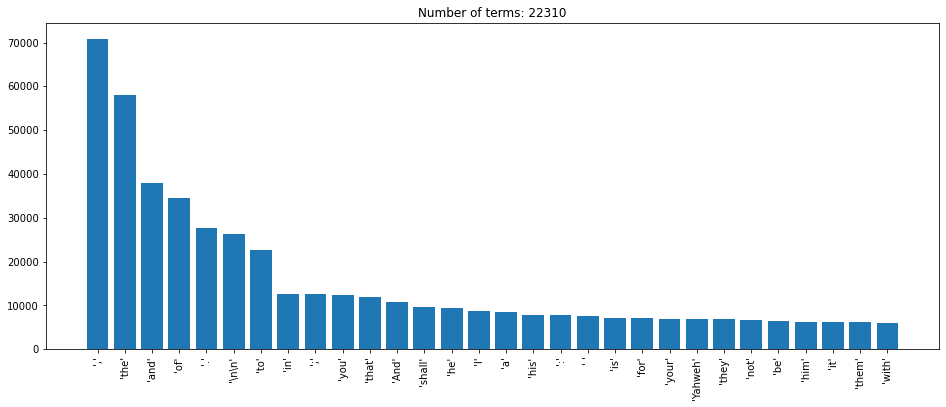

In [92]:
plot_words(['%r' % t.text for t in doc])

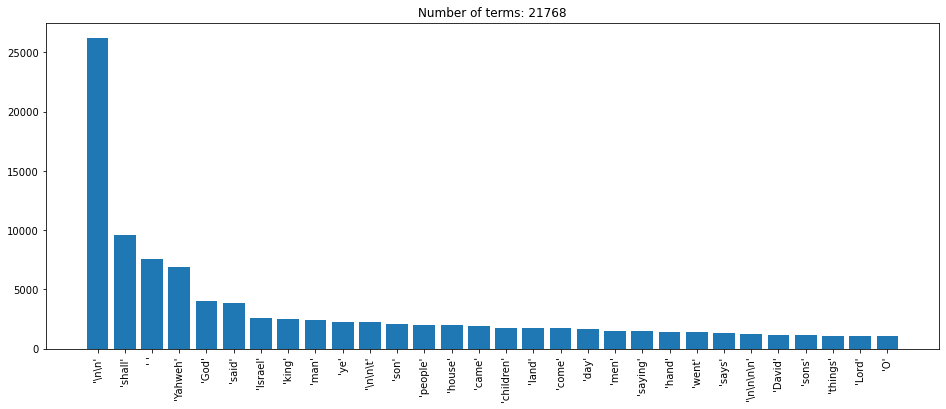

In [93]:
plot_words(['%r' % t.text for t in doc if not (t.is_stop | t.is_punct)])

## spaCy
for i, s in enumerate(doc.sents):
    print('%2d: %s' % (i, re.sub(r'\n+', '', s.text)))
    if s.as_doc().ents:
        print('-'*80)
        for e in s.as_doc().ents:
            print('%-11s: %s' % (e.label_, re.sub(r'\n+', '', e.text)))
    print('='*80)

In [94]:
# use nltk to find tokens
tokens = nltk.word_tokenize(my_text)

#for i, t in enumerate(tokens[:25]):
#    print('%2d| %r' % (i+1, t))

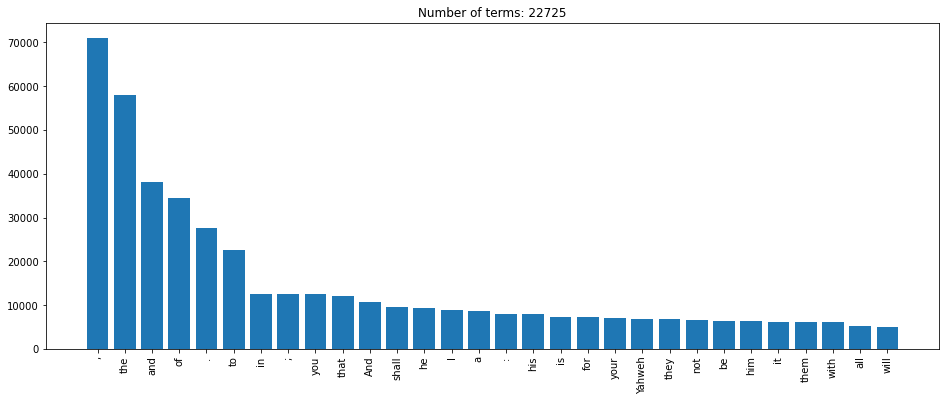

In [95]:
plot_words(tokens)

# Stop Words

## spaCy
print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
for i, t in enumerate(doc):
    print('%2d| %-15r %r' % (i+1, t.text, ('' if t.is_stop else t.text)))

    # break after the first sentence
 #   if t.text == '.':
 #       break

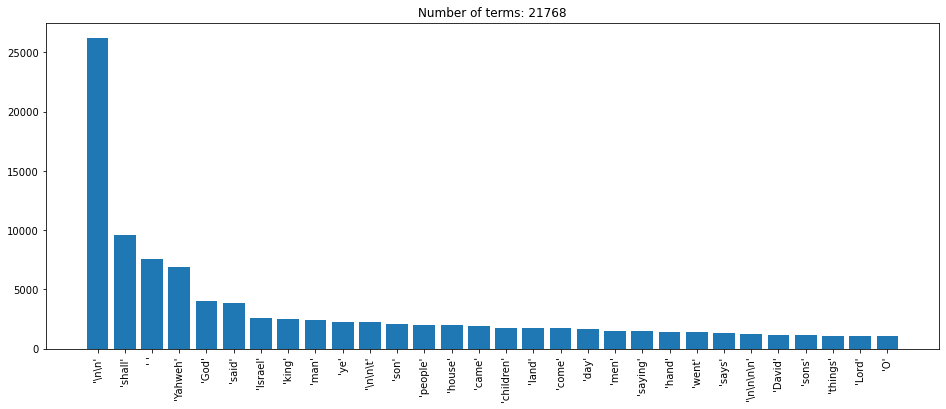

In [96]:

plot_words(['%r' % t.text for t in doc if not (t.is_stop | t.is_punct)])

In [97]:
stopWords = nltk.corpus.stopwords.words('english')

stopWords.sort()
print(', '.join(stopWords))

a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, her, here, hers, herself, him, himself, his, how, i, if, in, into, is, isn, isn't, it, it's, its, itself, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she's, should, should've, shouldn, shouldn't, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, this, those, through, to, too, under, until, up, ve, very, was, wasn, wasn't, we, were, weren, weren't, what, when, where, which, while, who, whom, why, w

In [98]:
tokens_no_stop = ('opportunity', 'temporarily', 'the', 'tree') # create a list of tokens withOUT the stop words 

## NLTK
i = 0
j = 0

print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
while i < len(tokens):
    # same word
    if tokens[i] == tokens_no_stop[j]:
        print('%2d| %-15r %r' % (i+1, tokens[i], tokens_no_stop[j]))
        j += 1
    # not the same word
    else:
        print('%2d| %-15r' % (i+1, tokens[i]))

    # next word
    i += 1
    # break after the first sentence
  #  if tokens[i-1] == '.':
  #      break

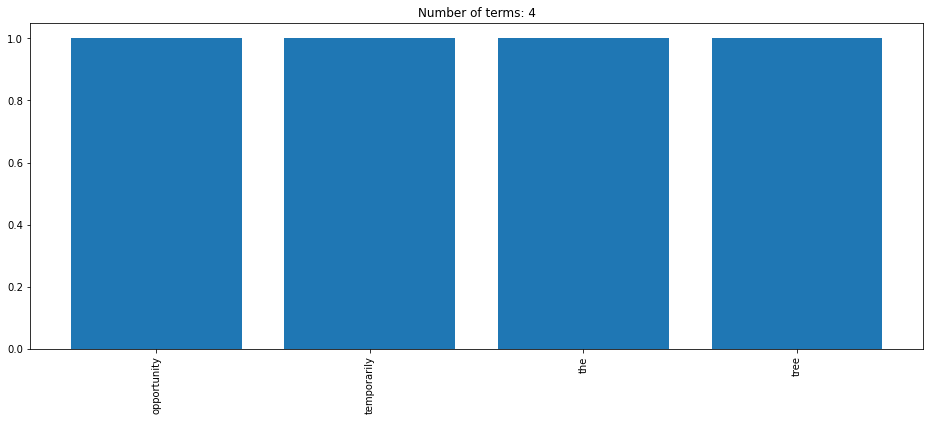

In [99]:
plot_words(tokens_no_stop)

# Check Parts of Speech

## spaCy
for i, t in enumerate(doc):
    print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    #if t.text == '.':
    #    break

In [100]:
matrix_type=[]

## spaCy
for i, t in enumerate(doc):
#print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    matrix_type.append(t.pos_)



In [101]:
matrix_type2=[]

In [102]:
## spaCy
for i, t in enumerate(doc):
#print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    matrix_type2.append(t.pos_)

In [103]:
matrix_type_df = pd.DataFrame(matrix_type,columns=['TagType'])

In [104]:
matrix_type_df.head()

,TagType
0,DET
1,PROPN
2,ADP
3,PROPN
4,SPACE


In [105]:
TagType = matrix_type_df['TagType'].value_counts()  # Good

In [106]:
TagType.head(20)

NOUN     130059
PUNCT    127074
PRON     112158
ADP      108429
VERB      95214
DET       86378
AUX       57964
PROPN     57775
CCONJ     55084
SPACE     38014
NUM       35795
ADV       27972
ADJ       22935
SCONJ     18139
PART      15660
INTJ       1920
X           161
SYM          24
Name: TagType, dtype: int64

In [107]:
TagType_df = pd.DataFrame(TagType)

In [108]:
TagType_df.head()

,TagType
NOUN,130059
PUNCT,127074
PRON,112158
ADP,108429
VERB,95214


In [109]:
TagType_df= TagType_df.reset_index() 
TagType_df = TagType_df.rename({'index' : 'Type'}, axis=1)

In [110]:
TagType_df.head(20)

,Type,TagType
0,NOUN,130059
1,PUNCT,127074
2,PRON,112158
3,ADP,108429
4,VERB,95214
5,DET,86378
6,AUX,57964
7,PROPN,57775
8,CCONJ,55084
9,SPACE,38014


In [111]:
verbs = TagType_df[TagType_df['Type'] =='VERB']

In [112]:
verbs.head()

,Type,TagType
4,VERB,95214


# From https://www.dataquest.io/blog/natural-language-processing-with-python/

In [113]:
transform_functions = [
    lambda x: len(x),
    lambda x: x.count(" "),
    lambda x: x.count("."),
    lambda x: x.count("!"),
    lambda x: x.count("?"),
    lambda x: len(x) / (x.count(" ") + 1),
    lambda x: x.count(" ") / (x.count(".") + 1),
    lambda x: len(re.findall("d", x)),
    lambda x: len(re.findall("[A-Z]", x)),
]


In [114]:
sentence_df.head()

,Sentence
0,The Revelation of John\n\nThe General Epistle ...
1,http://bit.ly/PrintPostWS \n\n\n\nThe Old Test...
2,(Until the rest are completed by David Robert ...
3,Acts is in progress.)
4,To download an edition of just the fresh trans...


In [115]:

# Apply each function and put the results into a list.
columns = []
for func in transform_functions:
    columns.append(sentence_df["Sentence"].apply(func))
    # Convert the meta features to a numpy array.
meta = np.asarray(columns).T

In [116]:
sentence_df.head()

,Sentence
0,The Revelation of John\n\nThe General Epistle ...
1,http://bit.ly/PrintPostWS \n\n\n\nThe Old Test...
2,(Until the rest are completed by David Robert ...
3,Acts is in progress.)
4,To download an edition of just the fresh trans...


In [117]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x1bd913bcdc8>,
 [Text(-0.440895313907006, 1.0077754324128183, 'NOUN'),
  Text(-1.0359078531763646, 0.36999313470324746, 'PUNCT'),
  Text(-1.0063899288970106, -0.44404877098655515, 'PRON'),
  Text(-0.4841978246719819, -0.9877005956173768, 'ADP'),
  Text(0.20767371957243075, -1.0802183233952993, 'VERB'),
  Text(0.7623822120346022, -0.792952308006747, 'DET'),
  Text(1.034303854479368, -0.3744536508155887, 'AUX'),
  Text(1.0997878076903078, 0.021605046997095655, 'PROPN'),
  Text(1.022544821541615, 0.4054652734062769, 'CCONJ'),
  Text(0.8603475567030849, 0.685421098066752, 'SPACE'),
  Text(0.6779354352070813, 0.8662583596656286, 'NUM'),
  Text(0.49015833530260833, 0.9847562167020708, 'ADV'),
  Text(0.3255149043480508, 1.0507330998152098, 'ADJ'),
  Text(0.18629508823644572, 1.0841098376543656, 'SCONJ'),
  Text(0.06926064845148427, 1.0978173630327042, 'PART'),
  Text(0.007987412049424339, 1.099971000185347, 'INTJ'),
  Text(0.0007289573917920513, 1.0999997584641

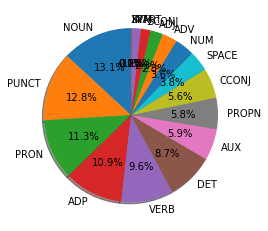

In [118]:
fig1, ax1 = plt.subplots()
ax1.pie(TagType_df['TagType'] ,  labels=TagType_df['Type'] , autopct='%1.1f%%',  shadow=True, startangle=90)

In [119]:
sentence_df.describe()

,Sentence
count,31383
unique,31172
top,Amen.
freq,31


# Lemmatisation

In [120]:
## spaCy
print('i | Token        Lemma')
print('--| ------------ ------------')
for i, t in enumerate(doc):
    print('%2d| %-12r %r' % (i+1, t.text, t.lemma_))
    if t.text == '.':
        break

i | Token        Lemma
--| ------------ ------------
 1| 'The'        'the'
 2| 'Revelation' 'Revelation'
 3| 'of'         'of'
 4| 'John'       'John'
 5| '\n\n'       '\n\n'
 6| 'The'        'the'
 7| 'General'    'General'
 8| 'Epistle'    'Epistle'
 9| 'of'         'of'
10| 'Jude'       'Jude'
11| '\n\n'       '\n\n'
12| 'The'        'the'
13| 'Second'     'Second'
14| 'Epistle'    'Epistle'
15| 'General'    'General'
16| 'of'         'of'
17| 'John'       'John'
18| '\n\n'       '\n\n'
19| 'The'        'the'
20| 'Third'      'Third'
21| 'Epistle'    'Epistle'
22| 'General'    'General'
23| 'of'         'of'
24| 'John'       'John'
25| '\n\n'       '\n\n'
26| 'The'        'the'
27| 'First'      'First'
28| 'Epistle'    'Epistle'
29| 'General'    'General'
30| 'of'         'of'
31| 'John'       'John'
32| '\n\n'       '\n\n'
33| 'The'        'the'
34| 'Second'     'Second'
35| 'Epistle'    'Epistle'
36| 'General'    'General'
37| 'of'         'of'
38| 'Peter'      'Peter'
39| '\n\n'

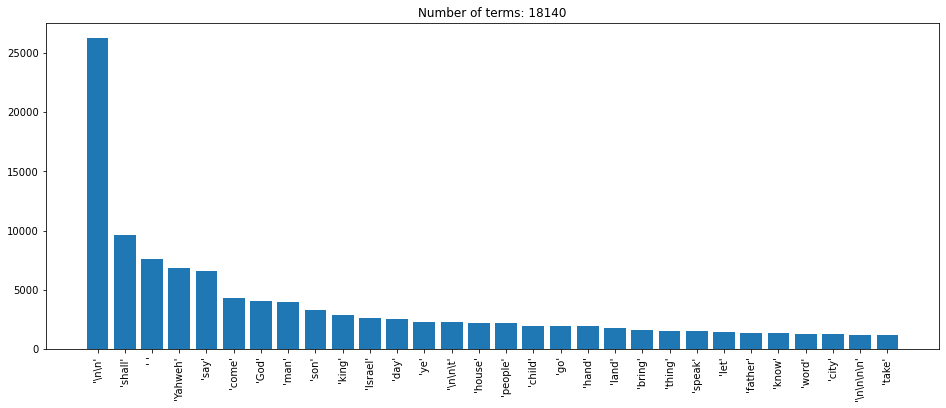

In [121]:
plot_words(['%r' % t.lemma_ for t in doc if not (t.is_stop | t.is_punct)])

# Identify Entities

## spaCy
for i, s in enumerate(doc.sents):
    print('%2d: %s' % (i, re.sub(r'\n+', '', s.text)))
    if s.as_doc().ents:
        print('-'*80)
        for e in s.as_doc().ents:
            print('%-11s: %s' % (e.label_, re.sub(r'\n+', '', e.text)))
    print('='*80)

# Tokenise

In [122]:
# use nltk to find tokens
tokens = nltk.word_tokenize(my_text)

#for i, t in enumerate(tokens[:25]):
#    print('%2d| %r' % (i+1, t))

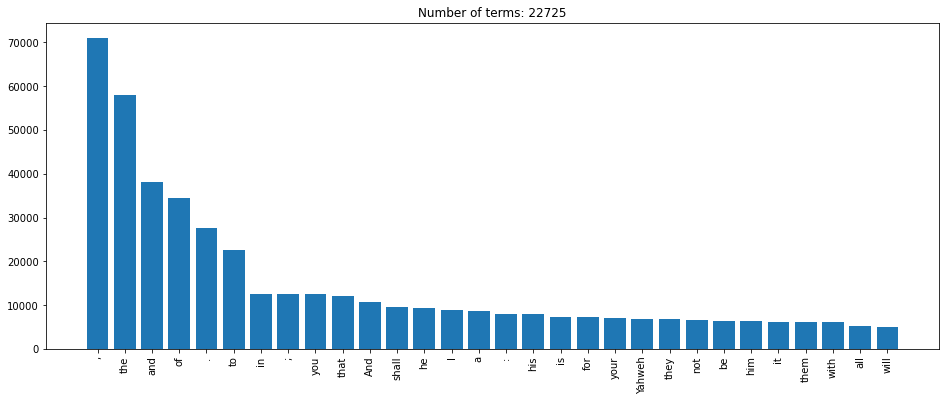

In [123]:
plot_words(tokens)

In [124]:
pos_list = {
    'CC':   'coordinating conjunction',
    'CD':   'cardinal digit',
    'DT':   'determiner',
    'EX':   'existential there (like: "there is" ... think of it like "there exists")',
    'FW':   'foreign word',
    'IN':   'preposition/subordinating conjunction',
    'JJ':   'adjective "big"',
    'JJR':  'adjective, comparative "bigger"',
    'JJS':  'adjective, superlative "biggest"',
    'LS':   'list marker 1)',
    'MD':   'modal could, will',
    'NN':   'noun, singular "desk"',
    'NNS':  'noun plural "desks"',
    'NNP':  'proper noun, singular "Harrison"',
    'NNPS': 'proper noun, plural "Americans"',
    'PDT':  'predeterminer "all the kids"',
    'POS':  'possessive ending parent"s',
    'PRP':  'personal pronoun I, he, she',
    'PRP$': 'possessive pronoun my, his, hers',
    'RB':   'adverb very, silently,',
    'RBR':  'adverb, comparative better',
    'RBS':  'adverb, superlative best',
    'RP':   'particle give up',
    'TO':   'to go "to" the store.',
    'UH':   'interjection errrrrrrrm',
    'VB':   'verb, base form take',
    'VBD':  'verb, past tense took',
    'VBG':  'verb, gerund/present participle taking',
    'VBN':  'verb, past participle taken',
    'VBP':  'verb, sing. present, non-3d take',
    'VBZ':  'verb, 3rd person sing. present takes',
    'WDT':  'wh-determiner which',
    'WP':   'wh-pronoun who, what',
    'WP$':  'possessive wh-pronoun whose',
    'WRB':  'wh-abverb where, when',
}

In [125]:
## nltk
tagged = nltk.pos_tag(tokens)

#for i, t in enumerate(tagged[:50]):
#    print('%2d|%-12r : %-4s %s' % (i+1, t[0], t[1], (pos_list[t[1]] if t[1] in pos_list else '-')))

# stemming

In [126]:
## nltk
ps = nltk.porter.PorterStemmer()
stemmed = ' '.join([ps.stem(word) for word in my_text.split()])

### Lemmatization

In [127]:
## nltk
wl = nltk.stem.WordNetLemmatizer()
lemma = ' '.join([wl.lemmatize(word) for word in my_text.split()])

In [128]:
## nltk
dot = stemmed.find('.') + 1
sl = stemmed[:dot].split()
dot = lemma.find('.') + 1
ll = lemma[:dot].split()



print('i | Stem           Lemma')
print('--| -------------- ------------')
for i, p in enumerate(zip(sl, ll)):
    print('%2d| %-12r   %-12r' % (i+1, p[0], p[1]))

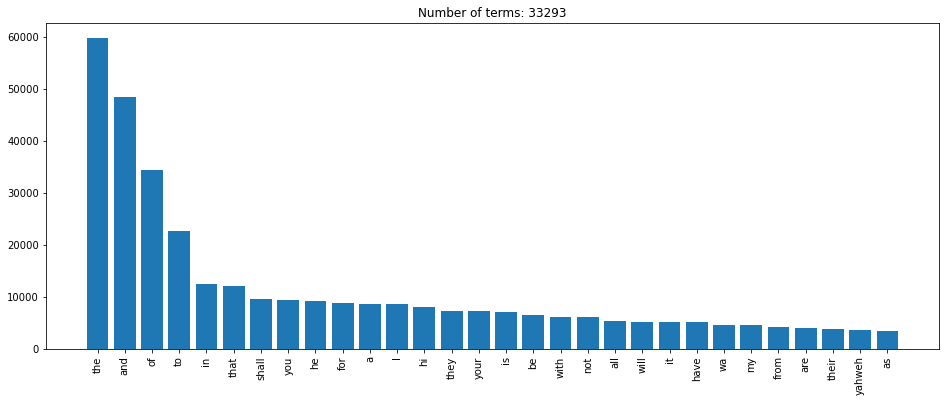

In [129]:
plot_words(stemmed.split())

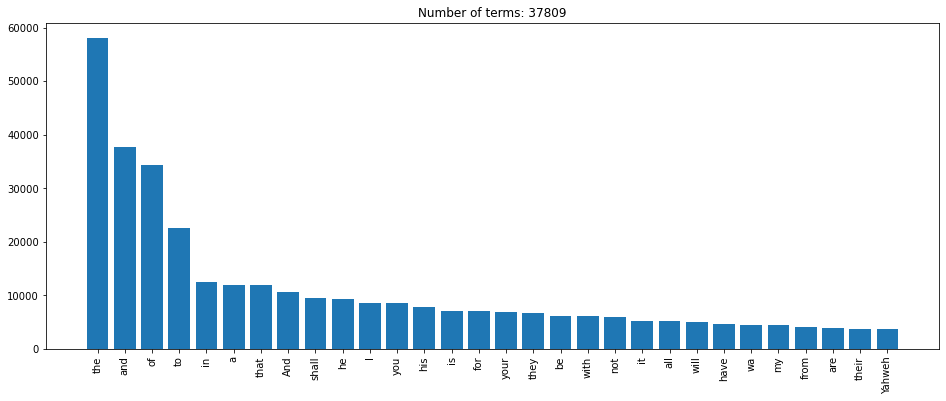

In [130]:
plot_words(lemma.split())

# Identities

In [131]:
## nltk
entities = nltk.chunk.ne_chunk(tagged)

for e in entities:
    s = re.sub(r'[\(\)]', '', str(e))
    if s.find('/NNP') > 0:
        t = s.split()[0]
        n = ' '.join([re.sub(r'/NNP', '', x) for x in s.split()[1:]])
        #print('%-12s: %s' % (t, n))

In [132]:
type(entities)

nltk.tree.Tree

In [133]:
#Combo['Catc'] =[]

In [134]:
typea=[]
Type_Detail=[]
for e in entities:
    s = re.sub(r'[\(\)]', '', str(e))
    if s.find('/NNP') > 0:
        t = s.split()[0]
        n = ' '.join([re.sub(r'/NNP', '', x) for x in s.split()[1:]])
        #print('%-12s: %s' % (t, n))
        typea.append(t)
        Type_Detail.append(n)

In [135]:
#print(typea)

In [136]:
#print(typea)

In [137]:
typea2=pd.DataFrame( list(reader(typea)))
Type_Detail=pd.DataFrame( list(reader(Type_Detail)))


In [138]:
print(type(Type_Detail))

<class 'pandas.core.frame.DataFrame'>


In [139]:
#typea2

In [140]:
Type_Detail

,0
0,Revelation
1,John
2,General Epistle
3,Second Epistle
4,John
...,...
40174,Come
40175,God
40176,God
40177,Lord Jesus


In [141]:
Type_Detail['Detail'] = Type_Detail

In [142]:
Type_Detail['Category'] = typea2

In [143]:
#typea2

In [144]:
Type_Detail

,0,Detail,Category
0,Revelation,Revelation,ORGANIZATION
1,John,John,PERSON
2,General Epistle,General Epistle,ORGANIZATION
3,Second Epistle,Second Epistle,ORGANIZATION
4,John,John,PERSON
...,...,...,...
40174,Come,Come,ORGANIZATION
40175,God,God,PERSON
40176,God,God,PERSON
40177,Lord Jesus,Lord Jesus,PERSON


In [145]:
#Type_Detail['Category'] = typea2['Category'] 

In [146]:
Type_Detail['Category'].value_counts()

GPE             18545
PERSON          16793
ORGANIZATION     4349
FACILITY          243
GSP               206
LOCATION           43
Name: Category, dtype: int64

In [147]:
Type_Detail.head()

,0,Detail,Category
0,Revelation,Revelation,ORGANIZATION
1,John,John,PERSON
2,General Epistle,General Epistle,ORGANIZATION
3,Second Epistle,Second Epistle,ORGANIZATION
4,John,John,PERSON


In [148]:
Type_Detail['Concat'] = (Type_Detail['Detail'] + Type_Detail['Category'])

In [149]:
Type_Detail.shape

(40179, 4)

In [150]:
Type_Detail_Full = Type_Detail.copy()

In [151]:
People_Full = Type_Detail_Full[Type_Detail_Full['Category'] =='PERSON']
People_List = People_Full['Detail'].value_counts()
People_List=pd.DataFrame(People_List) #, columns = 'çount')
People_List.head(20)

,Detail
Yahweh,2593
David,1110
God,571
Jesus,519
Aaron,276
Saul,268
Jacob,267
O Yahweh,250
Moses,223
Solomon,218


In [152]:
Place_Full = Type_Detail_Full[Type_Detail_Full['Category'] =='GPE']
Place_List = Place_Full['Detail'].value_counts()
Place_List=pd.DataFrame(Place_List)
Place_List.head(20)

,Detail
Israel,2523
Yahweh,2323
Jerusalem,661
Egypt,608
Judah,519
God,459
Moses,415
Behold,211
Jordan,194
Christ,153


In [153]:
Org_Full = Type_Detail_Full[Type_Detail_Full['Category'] =='ORGANIZATION']
Org_List = Org_Full['Detail'].value_counts()
Org_List=pd.DataFrame(Org_List)
Org_List.head(20)

,Detail
Lord,547
Yahweh,320
Son,159
Lord Yahweh,145
Spirit,113
PhilistinesS,93
Levites,86
Holy Spirit,86
Come,79
God,72


In [154]:
FACILITY_Full = Type_Detail_Full[Type_Detail_Full['Category'] =='FACILITY']
Facility_List = FACILITY_Full['Detail'].value_counts()
Facility_List=pd.DataFrame(Facility_List)
Facility_List.head(20)

,Detail
Hittite,30
Amorite,23
Canaanite,22
Perizzite,15
Netophathite,8
Girgashite,7
Gittite,6
Shunammite,5
Agagite,5
Carmelite,5


In [155]:
GSP_Full = Type_Detail_Full[Type_Detail_Full['Category'] =='GSP']
GSP_List = GSP_Full['Detail'].value_counts()
GSP_List=pd.DataFrame(GSP_List)
GSP_List.head(20)

,Detail
Syria,72
Philistines,65
Israel,27
Damascus,21
Assyria,8
Haran,5
Samaria,3
Philadelphia,3
Sidon,1
Gehenna,1


In [156]:
LOCATION_Full = Type_Detail_Full[Type_Detail_Full['Category'] =='LOCATION']
Location_List = LOCATION_Full['Detail'].value_counts()
Location_List=pd.DataFrame(GSP_List)
Location_List.head(20)

,Detail
Syria,72
Philistines,65
Israel,27
Damascus,21
Assyria,8
Haran,5
Samaria,3
Philadelphia,3
Sidon,1
Gehenna,1


In [157]:
Type_Detail.drop_duplicates(subset ="Concat",  keep = False, inplace = True) 

In [158]:
Type_Detail.shape

(2621, 4)

In [159]:
Type_Detail.head()

,0,Detail,Category,Concat
47,Prophet Jeremiah The/DT Song,Prophet Jeremiah The/DT Song,ORGANIZATION,Prophet Jeremiah The/DT SongORGANIZATION
48,Songs,Songs,GPE,SongsGPE
56,Called/VBD Genesis,Called/VBD Genesis,PERSON,Called/VBD GenesisPERSON
59,Called/VBD Exodus Table,Called/VBD Exodus Table,PERSON,Called/VBD Exodus TablePERSON
61,Old Testament,Old Testament,PERSON,Old TestamentPERSON


In [160]:
Type_Detail['Category'].value_counts()

PERSON          1079
GPE             1040
ORGANIZATION     463
FACILITY          32
LOCATION           5
GSP                2
Name: Category, dtype: int64

In [161]:
People= Type_Detail[Type_Detail['Category'] =='PERSON']
Places= Type_Detail[Type_Detail['Category'] =='GPE']
Orgs= Type_Detail[Type_Detail['Category'] =='ORGANIZATION']

In [162]:
Orgs['Detail'].head(30)

47                  Prophet Jeremiah The/DT Song
64                                   Fourth Book
66               Called/VBD NumbersS The/DT Book
80           Prophet Malachi The/DT Lamentations
90      Second Epistle Of/IN Paul The/DT Apostle
106                               Prophet Daniel
113                    Prophet Micah The/DT Book
121                                      ASV Old
129                                          KJV
132                              Textus Receptus
207                                   EuphratesS
409                                          Ham
1168                                   Machpelah
1604                                   Fortunate
1710                                        Fear
1764                                      Jabbok
1832                               Shechem Hamor
1890                                      Pillar
1951                                        Esau
2008                                      Horite
2131                

In [163]:
Places['Detail'].head(30)

48            Songs
117             New
118          Amazon
160           Night
167            Seas
231        Cherubim
259             Nod
268        Mehujael
274          Zillah
455          Sabtah
457         Sabteca
464           Erech
481     Philistines
502           Lasha
515            Mash
536           Mesha
537          Sephar
591           Iscah
698          Shinab
711         Elparan
742            Aner
746           Hobah
751          Shaveh
752          Valley
954          Escape
1086         Moriah
1130          Gaham
1131         Tahash
1146          Zohar
1255         Zimran
Name: Detail, dtype: object

In [164]:
People['Detail'].head(60)

56                                     Called/VBD Genesis
59                                Called/VBD Exodus Table
61                                          Old Testament
63                                   Called/VBD Leviticus
140     Exodus Leviticus Numbers Deuteronomy Joshua Ju...
141     Chronicles Ezra Nehemiah Esther Job Psalms Pro...
142          Solomon Isaiah Jeremiah Lamentations Ezekiel
143     Daniel Hosea Joel Amos Obadiah Jonah Micah Nah...
149                                     Matthew Mark Luke
150                                            John Error
151                        Timothy Titus Philemon Hebrews
152                                             John Jude
201                                                Pishon
267                                              Mehujael
276                                                 Jabal
278                                                Naamah
284                                          Truly Lamech
440           

In [165]:
#typea2 = typea2.rename({'0' : 'Categ'}, axis=1)

# Look at Data

In [166]:
dfs = my_text

In [167]:
import sys
sys.getsizeof(my_text)

8709676

In [168]:
#print(entities)

In [169]:
#print(sentences)

# Get into a datafram


In [170]:
#Total1 =pd.DataFrame( list(reader(my_original_text)))
#Total1.head()

In [171]:
#Total2 =pd.DataFrame( list(reader(sentences)))

# Add counts

In [172]:
sentence_df['sentence_length'] = sentence_df['Sentence'].apply(len)
sentence_df['word_count'] = sentence_df['Sentence'].apply(lambda x: len(x.split()))
sentence_df['word_density'] = sentence_df['sentence_length'] / (sentence_df['word_count'] + 1)
sentence_df['punctuation_count'] = sentence_df['Sentence'].apply(lambda x: len(''.join(_ for _ in x if _ in string.punctuation))) 
sentence_df['title_word_count'] = sentence_df['Sentence'].apply(lambda x: len([w for w in x.split() if w.istitle()]))
sentence_df['uppercase_word_count'] = sentence_df['Sentence'].apply(lambda x: len([w for w in x.split() if w.isupper()]))

In [173]:
sentence_df.head(10)

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count
0,The Revelation of John\n\nThe General Epistle ...,2807,455,6.155702,45,307,2
1,http://bit.ly/PrintPostWS \n\n\n\nThe Old Test...,354,55,6.321429,20,20,3
2,(Until the rest are completed by David Robert ...,76,13,5.428571,2,4,0
3,Acts is in progress.),21,4,4.200000,2,1,0
4,To download an edition of just the fresh trans...,525,62,8.333333,36,14,1
5,You can also use the Document Map feature by o...,77,15,4.812500,1,5,0
6,"In Adobe Acrobat Reader, you can navigate to t...",315,52,5.943396,7,9,0
7,The Old Testament\n\n\n\n\n\n\n\n Genesis\n\n ...,540,69,7.714286,3,49,1
8,You can also use the Document Map feature by o...,77,15,4.812500,1,5,0
9,"In Adobe Acrobat Reader, you can navigate to t...",315,52,5.943396,7,9,0


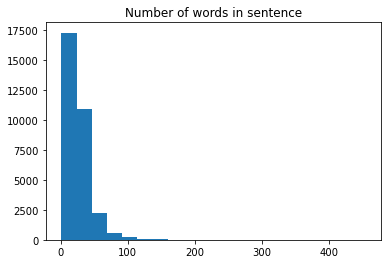

In [174]:
import matplotlib.pyplot as plt
num_bins = 20
plt.title('Number of words in sentence')
plt.hist(sentence_df['word_count'], bins =num_bins)
plt.show()


In [175]:
sentence_df.sum()

Sentence                The Revelation of John\n\nThe General Epistle ...
sentence_length                                                   4291038
word_count                                                         821188
word_density                                                       154854
punctuation_count                                                  158760
title_word_count                                                    99579
uppercase_word_count                                                10423
dtype: object

In [176]:
sentence_df.describe()

,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count
count,31383.000000,31383.000000,31383.000000,31383.00000,31383.000000,31383.000000
mean,136.731288,26.166651,4.934312,5.05879,3.173024,0.332122
std,103.256286,19.040236,0.547576,4.81070,3.279108,0.749297
min,4.000000,1.000000,2.000000,1.00000,0.000000,0.000000
25%,76.000000,14.000000,4.650000,3.00000,1.000000,0.000000
50%,113.000000,22.000000,4.945455,4.00000,2.000000,0.000000
75%,170.000000,33.000000,5.236842,6.00000,4.000000,0.000000
max,3438.000000,455.000000,47.095890,505.00000,307.000000,12.000000


In [177]:
# From 9.6

In [178]:
def convert_text(text):
    '''
    Use techniques learned in previous labs. Remove StopWords, Punctuation, Lemmatize etc.
    '''
    doc = nlp(text)
    tokens = [t for t in doc if not (t.is_stop | t.is_punct)]
    tokens = [t.lemma_ for t in tokens]
    clean_text = ' '.join(tokens)

    return clean_text

In [179]:
sentence_df['short'] = sentence_df['Sentence'].apply(convert_text)

In [180]:
sentence_df.head()

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short
0,The Revelation of John\n\nThe General Epistle ...,2807,455,6.155702,45,307,2,Revelation John \n\n General Epistle Jude \n\n...
1,http://bit.ly/PrintPostWS \n\n\n\nThe Old Test...,354,55,6.321429,20,20,3,http://bit.ly/PrintPostWS \n\n\n\n Old Testame...
2,(Until the rest are completed by David Robert ...,76,13,5.428571,2,4,0,rest complete David Robert Palmer translation
3,Acts is in progress.),21,4,4.200000,2,1,0,act progress
4,To download an edition of just the fresh trans...,525,62,8.333333,36,14,1,download edition fresh translation part David ...


# Add Sentiment
* https://www.programcreek.com/python/example/100005/nltk.sentiment.vader.SentimentIntensityAnalyzer

In [181]:
sentence_df.head()

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short
0,The Revelation of John\n\nThe General Epistle ...,2807,455,6.155702,45,307,2,Revelation John \n\n General Epistle Jude \n\n...
1,http://bit.ly/PrintPostWS \n\n\n\nThe Old Test...,354,55,6.321429,20,20,3,http://bit.ly/PrintPostWS \n\n\n\n Old Testame...
2,(Until the rest are completed by David Robert ...,76,13,5.428571,2,4,0,rest complete David Robert Palmer translation
3,Acts is in progress.),21,4,4.200000,2,1,0,act progress
4,To download an edition of just the fresh trans...,525,62,8.333333,36,14,1,download edition fresh translation part David ...


In [182]:
sentence_df.shape

(31383, 8)

In [183]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA


In [184]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [185]:
stripped_df.head()

,Words
0,The
1,Revelation
2,of
3,John
4,The


In [186]:
sentence_df.head()

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short
0,The Revelation of John\n\nThe General Epistle ...,2807,455,6.155702,45,307,2,Revelation John \n\n General Epistle Jude \n\n...
1,http://bit.ly/PrintPostWS \n\n\n\nThe Old Test...,354,55,6.321429,20,20,3,http://bit.ly/PrintPostWS \n\n\n\n Old Testame...
2,(Until the rest are completed by David Robert ...,76,13,5.428571,2,4,0,rest complete David Robert Palmer translation
3,Acts is in progress.),21,4,4.200000,2,1,0,act progress
4,To download an edition of just the fresh trans...,525,62,8.333333,36,14,1,download edition fresh translation part David ...


In [187]:
sia = SIA()
results = []

for i in range (len(sentence_df)):
    pol_score = sia.polarity_scores(sentence_df['Sentence'][i])
    results.append(pol_score)
    #print(i)
    #print(results)

In [188]:
 print(type(results))

<class 'list'>


In [189]:
 #print(results)

In [190]:
results_df = pd.DataFrame(results) #.reset_index()

In [191]:
results_df.head()

,neg,neu,pos,compound
0,0.012,0.985,0.004,-0.5583
1,0.000,0.957,0.043,0.3182
2,0.000,1.000,0.000,0.0000
3,0.000,1.000,0.000,0.0000
4,0.000,0.964,0.036,0.3182


In [192]:
results_df.shape

(31383, 4)

In [193]:
sentence_df.shape

(31383, 8)

In [194]:
results_df['AlexMarker'] = "TBD"
results_df['AlexMarkerPrevalent'] = "TBD"

In [195]:
results_df.head()

,neg,neu,pos,compound,AlexMarker,AlexMarkerPrevalent
0,0.012,0.985,0.004,-0.5583,TBD,TBD
1,0.000,0.957,0.043,0.3182,TBD,TBD
2,0.000,1.000,0.000,0.0000,TBD,TBD
3,0.000,1.000,0.000,0.0000,TBD,TBD
4,0.000,0.964,0.036,0.3182,TBD,TBD


In [196]:
for i in range (len(results_df)):
   # print(results_df['neg'][i] )
    if results_df['neg'][i] >  results_df['pos'][i]:
        if results_df['neg'][i] >  results_df['neu'][i]:
            results_df['AlexMarker'][i] ="Negative"
        else:
            results_df['AlexMarker'][i] ="Neutral"
    else:
        if results_df['pos'][i] >  results_df['neu'][i]:
            results_df['AlexMarker'][i] ="Positive"
        else:
            results_df['AlexMarker'][i] ="Neutral"


C:\Users\alexd\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\alexd\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\alexd\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\a

In [197]:
results_df.head()

,neg,neu,pos,compound,AlexMarker,AlexMarkerPrevalent
0,0.012,0.985,0.004,-0.5583,Neutral,TBD
1,0.000,0.957,0.043,0.3182,Neutral,TBD
2,0.000,1.000,0.000,0.0000,Neutral,TBD
3,0.000,1.000,0.000,0.0000,Neutral,TBD
4,0.000,0.964,0.036,0.3182,Neutral,TBD


In [198]:
sentence_df['neg'] = results_df['neg']
sentence_df['neu'] = results_df['neu']
sentence_df['pos'] = results_df['pos']
sentence_df['compound'] = results_df['compound']
sentence_df['AlexMarker'] = results_df['AlexMarker']

In [199]:
sentence_df['AlexMarker'].value_counts()

Neutral     31082
Positive      185
Negative      116
Name: AlexMarker, dtype: int64

In [200]:
sentence_df.head(20)

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short,neg,neu,pos,compound,AlexMarker
0,The Revelation of John\n\nThe General Epistle ...,2807,455,6.155702,45,307,2,Revelation John \n\n General Epistle Jude \n\n...,0.012,0.985,0.004,-0.5583,Neutral
1,http://bit.ly/PrintPostWS \n\n\n\nThe Old Test...,354,55,6.321429,20,20,3,http://bit.ly/PrintPostWS \n\n\n\n Old Testame...,0.000,0.957,0.043,0.3182,Neutral
2,(Until the rest are completed by David Robert ...,76,13,5.428571,2,4,0,rest complete David Robert Palmer translation,0.000,1.000,0.000,0.0000,Neutral
3,Acts is in progress.),21,4,4.200000,2,1,0,act progress,0.000,1.000,0.000,0.0000,Neutral
4,To download an edition of just the fresh trans...,525,62,8.333333,36,14,1,download edition fresh translation part David ...,0.000,0.964,0.036,0.3182,Neutral
5,You can also use the Document Map feature by o...,77,15,4.812500,1,5,0,use Document Map feature open View Menu,0.000,1.000,0.000,0.0000,Neutral
6,"In Adobe Acrobat Reader, you can navigate to t...",315,52,5.943396,7,9,0,Adobe Acrobat Reader navigate topic heading ...,0.000,0.953,0.047,0.3612,Neutral
7,The Old Testament\n\n\n\n\n\n\n\n Genesis\n\n ...,540,69,7.714286,3,49,1,Old Testament \n\n\n\n\n\n\n\n Genesis \n\n ...,0.045,0.955,0.000,-0.4404,Neutral
8,You can also use the Document Map feature by o...,77,15,4.812500,1,5,0,use Document Map feature open View Menu,0.000,1.000,0.000,0.0000,Neutral
9,"In Adobe Acrobat Reader, you can navigate to t...",315,52,5.943396,7,9,0,Adobe Acrobat Reader navigate topic heading ...,0.000,0.953,0.047,0.3612,Neutral


In [201]:
sentence_df.sort_values(by=['neg'],ascending=False)

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short,neg,neu,pos,compound,AlexMarker
11450,treason!,8,1,4.000000,1,0,0,treason,1.000,0.000,0.000,-0.4926,Negative
21953,Alas!,5,1,2.500000,1,1,0,alas,1.000,0.000,0.000,-0.3382,Negative
9822,Treason!,8,1,4.000000,1,1,0,Treason,1.000,0.000,0.000,-0.4926,Negative
570,Fear not.,9,2,3.000000,1,1,0,fear,0.762,0.238,0.000,-0.4939,Negative
23668,17O you blind fools!,20,4,4.000000,1,1,1,17o blind fool,0.756,0.244,0.000,-0.7345,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18087,"41:4 Who has wrought and done it, calling the ...",77,13,5.500000,3,1,0,41:4 work call generation beginning,0.000,1.000,0.000,0.0000,Neutral
18086,"41:3 He pursues them, and passes on safely, ev...",93,20,4.428571,4,1,0,41:3 pursue pass safely way go foot,0.000,0.849,0.151,0.4939,Neutral
18085,"he gives nations before him, and makes him rul...",133,27,4.750000,4,0,0,give nation make rule king give dust sword dri...,0.000,1.000,0.000,0.0000,Neutral
18084,"41:2 Who has raised up one from the east, whom...",85,17,4.722222,3,1,0,41:2 raise east call righteousness foot,0.000,1.000,0.000,0.0000,Neutral


In [202]:
tempneg = sentence_df.sort_values(by=['neg'],ascending=False)

In [203]:
tempneg.head(10)

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short,neg,neu,pos,compound,AlexMarker
11450,treason!,8,1,4.000000,1,0,0,treason,1.000,0.000,0.0,-0.4926,Negative
21953,Alas!,5,1,2.500000,1,1,0,alas,1.000,0.000,0.0,-0.3382,Negative
9822,Treason!,8,1,4.000000,1,1,0,Treason,1.000,0.000,0.0,-0.4926,Negative
570,Fear not.,9,2,3.000000,1,1,0,fear,0.762,0.238,0.0,-0.4939,Negative
23668,17O you blind fools!,20,4,4.000000,1,1,1,17o blind fool,0.756,0.244,0.0,-0.7345,Negative
10091,And Hezekiah wept sore.,23,4,4.600000,1,2,0,Hezekiah weep sore,0.733,0.267,0.0,-0.6705,Negative
18731,"4:19 My anguish, my anguish!",28,5,4.666667,3,1,0,4:19 anguish anguish,0.730,0.270,0.0,-0.8439,Negative
19358,30:7 Alas!,10,2,3.333333,2,1,0,30:7 alas,0.705,0.295,0.0,-0.3382,Negative
28785,12:17 Return to no man evil for evil.,37,8,4.111111,2,1,0,12:17 return man evil evil,0.688,0.312,0.0,-0.9001,Negative
17338,3:11 Woe to the wicked!,23,5,3.833333,2,1,0,3:11 Woe wicked,0.684,0.316,0.0,-0.7574,Negative


In [204]:
temppos = sentence_df.sort_values(by=['pos'],ascending=False)

In [205]:
temppos.head(100)

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short,neg,neu,pos,compound,AlexMarker
31291,Worship God.,12,2,4.000000,1,2,0,worship God,0.0,0.000,1.000,0.5106,Positive
14686,Blessed be God.,15,3,3.750000,1,2,0,bless God,0.0,0.143,0.857,0.7184,Positive
27139,Trust in God.,13,3,3.250000,1,2,0,trust God,0.0,0.156,0.844,0.6597,Positive
28095,I am clean.,11,3,2.750000,1,1,1,clean,0.0,0.270,0.730,0.4019,Positive
28041,Certainly not!,14,2,4.666667,1,1,0,certainly,0.0,0.271,0.729,0.4003,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30074,4:9 This is a faithful saying and worthy of al...,60,11,5.000000,2,1,0,4:9 faithful saying worthy acceptation,0.0,0.464,0.536,0.7964,Positive
25266,For the sinners also love the ones loving them.,47,9,4.700000,1,1,0,sinner love one love,0.0,0.464,0.536,0.8442,Positive
30813,"⁷Beloved, let us love one another; for love is...",108,22,4.695652,5,4,0,⁷beloved let love love God love bear God know God,0.0,0.465,0.535,0.9545,Positive
30595,He should pray.,15,3,3.750000,1,1,0,pray,0.0,0.465,0.535,0.3182,Positive


In [206]:
sentence_df_sentiment_only = sentence_df.copy()

In [207]:
sentence_df_sentiment_only = sentence_df_sentiment_only.drop(["sentence_length","word_count","word_density","punctuation_count","title_word_count","uppercase_word_count" ],axis=1,inplace=True)



In [208]:
print(sentence_df_sentiment_only)

None


In [209]:
sentence_df['compound_cut'] = pd.cut(sentence_df['compound'],10)
sentence_df['pos_cut'] = pd.cut(sentence_df['pos'],10)
sentence_df['neg_cut'] = pd.cut(sentence_df['neg'],10)
sentence_df['neu_cut'] = pd.cut(sentence_df['neu'],10)

In [210]:
pd.cut(sentence_df['neg'],10)

0        (-0.001, 0.1]
1        (-0.001, 0.1]
2        (-0.001, 0.1]
3        (-0.001, 0.1]
4        (-0.001, 0.1]
             ...      
31378    (-0.001, 0.1]
31379    (-0.001, 0.1]
31380    (-0.001, 0.1]
31381    (-0.001, 0.1]
31382    (-0.001, 0.1]
Name: neg, Length: 31383, dtype: category
Categories (10, interval[float64]): [(-0.001, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [211]:
sentence_df['compound_qcut'] = pd.qcut(sentence_df['compound'],10,duplicates='drop') # duplicates='drop')
sentence_df['pos_qcut'] = pd.qcut(sentence_df['pos'],10,duplicates='drop') # duplicates='drop')
sentence_df['neg_qcut'] = pd.qcut(sentence_df['neg'],10,duplicates='drop') # duplicates='drop')
sentence_df['neu_qcut'] = pd.qcut(sentence_df['neu'],10,duplicates='drop') # duplicates='drop')

In [212]:
sentence_df.head(20)

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short,neg,neu,...,compound,AlexMarker,compound_cut,pos_cut,neg_cut,neu_cut,compound_qcut,pos_qcut,neg_qcut,neu_qcut
0,The Revelation of John\n\nThe General Epistle ...,2807,455,6.155702,45,307,2,Revelation John \n\n General Epistle Jude \n\n...,0.012,0.985,...,-0.5583,Neutral,"(-0.591, -0.393]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(-0.988, -0.557]","(-0.001, 0.061]","(-0.001, 0.069]","(0.942, 1.0]"
1,http://bit.ly/PrintPostWS \n\n\n\nThe Old Test...,354,55,6.321429,20,20,3,http://bit.ly/PrintPostWS \n\n\n\n Old Testame...,0.000,0.957,...,0.3182,Neutral,"(0.201, 0.399]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(0.273, 0.452]","(-0.001, 0.061]","(-0.001, 0.069]","(0.942, 1.0]"
2,(Until the rest are completed by David Robert ...,76,13,5.428571,2,4,0,rest complete David Robert Palmer translation,0.000,1.000,...,0.0000,Neutral,"(-0.195, 0.0027]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(-0.296, 0.0]","(-0.001, 0.061]","(-0.001, 0.069]","(0.942, 1.0]"
3,Acts is in progress.),21,4,4.200000,2,1,0,act progress,0.000,1.000,...,0.0000,Neutral,"(-0.195, 0.0027]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(-0.296, 0.0]","(-0.001, 0.061]","(-0.001, 0.069]","(0.942, 1.0]"
4,To download an edition of just the fresh trans...,525,62,8.333333,36,14,1,download edition fresh translation part David ...,0.000,0.964,...,0.3182,Neutral,"(0.201, 0.399]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(0.273, 0.452]","(-0.001, 0.061]","(-0.001, 0.069]","(0.942, 1.0]"
5,You can also use the Document Map feature by o...,77,15,4.812500,1,5,0,use Document Map feature open View Menu,0.000,1.000,...,0.0000,Neutral,"(-0.195, 0.0027]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(-0.296, 0.0]","(-0.001, 0.061]","(-0.001, 0.069]","(0.942, 1.0]"
6,"In Adobe Acrobat Reader, you can navigate to t...",315,52,5.943396,7,9,0,Adobe Acrobat Reader navigate topic heading ...,0.000,0.953,...,0.3612,Neutral,"(0.201, 0.399]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(0.273, 0.452]","(-0.001, 0.061]","(-0.001, 0.069]","(0.942, 1.0]"
7,The Old Testament\n\n\n\n\n\n\n\n Genesis\n\n ...,540,69,7.714286,3,49,1,Old Testament \n\n\n\n\n\n\n\n Genesis \n\n ...,0.045,0.955,...,-0.4404,Neutral,"(-0.591, -0.393]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(-0.557, -0.296]","(-0.001, 0.061]","(-0.001, 0.069]","(0.942, 1.0]"
8,You can also use the Document Map feature by o...,77,15,4.812500,1,5,0,use Document Map feature open View Menu,0.000,1.000,...,0.0000,Neutral,"(-0.195, 0.0027]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(-0.296, 0.0]","(-0.001, 0.061]","(-0.001, 0.069]","(0.942, 1.0]"
9,"In Adobe Acrobat Reader, you can navigate to t...",315,52,5.943396,7,9,0,Adobe Acrobat Reader navigate topic heading ...,0.000,0.953,...,0.3612,Neutral,"(0.201, 0.399]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(0.273, 0.452]","(-0.001, 0.061]","(-0.001, 0.069]","(0.942, 1.0]"


In [213]:
sentence_df['pos_cut'].value_counts()

(-0.001, 0.1]    21815
(0.1, 0.2]        5680
(0.2, 0.3]        2373
(0.3, 0.4]         986
(0.4, 0.5]         365
(0.5, 0.6]         116
(0.6, 0.7]          42
(0.7, 0.8]           3
(0.8, 0.9]           2
(0.9, 1.0]           1
Name: pos_cut, dtype: int64

In [214]:
sentence_df['pos_qcut'].value_counts()

(-0.001, 0.061]    18866
(0.061, 0.103]      3185
(0.15, 0.225]       3160
(0.225, 1.0]        3097
(0.103, 0.15]       3075
Name: pos_qcut, dtype: int64

In [215]:
sentence_df['neg_qcut'].value_counts()

(-0.001, 0.069]    22009
(0.121, 0.193]      3130
(0.193, 1.0]        3125
(0.069, 0.121]      3119
Name: neg_qcut, dtype: int64

In [216]:
sentence_df['neu_qcut'].value_counts()

(0.942, 1.0]       12516
(0.811, 0.856]      3210
(-0.001, 0.676]     3163
(0.896, 0.942]      3151
(0.676, 0.756]      3137
(0.756, 0.811]      3128
(0.856, 0.896]      3078
Name: neu_qcut, dtype: int64

In [217]:
sentence_df['compound_qcut'].value_counts()

(-0.296, 0.0]       13563
(-0.988, -0.557]     3312
(-0.557, -0.296]     3217
(0.452, 0.649]       3152
(0.649, 0.992]       3125
(0.0, 0.273]         2773
(0.273, 0.452]       2241
Name: compound_qcut, dtype: int64

In [218]:
positive_df = sentence_df[sentence_df['AlexMarker']=="Positive"]

In [219]:
negative_df = sentence_df[sentence_df['AlexMarker']=="Negative"]

In [220]:
#positive_df.sample(10)

In [221]:
positive_df.shape

(185, 21)

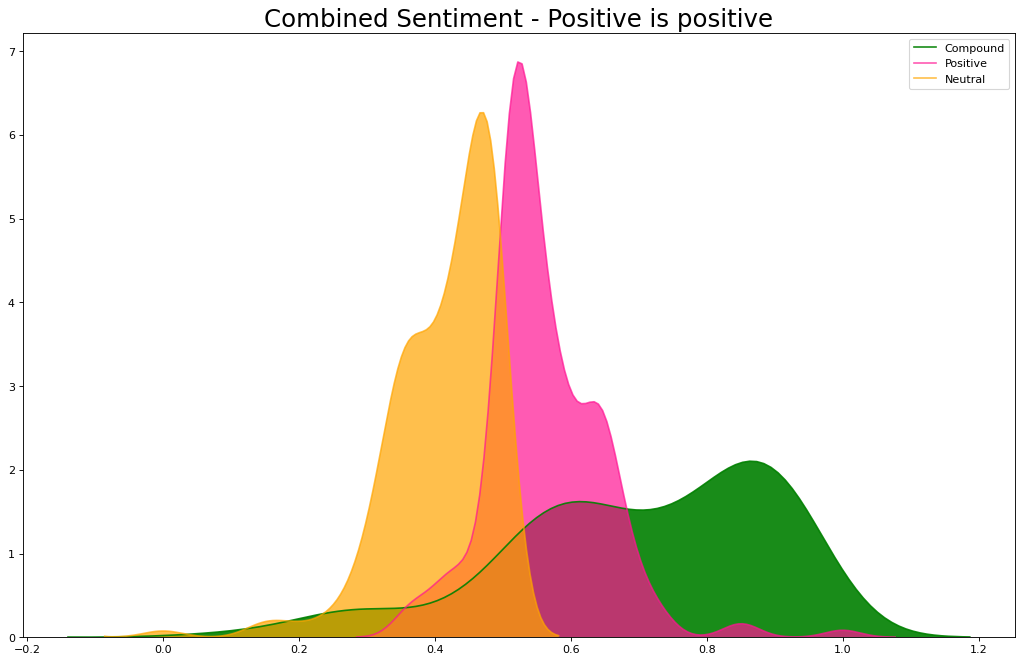

In [222]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(positive_df['compound'], shade=True, color="g", label="Compound", alpha=.9)
sns.kdeplot(positive_df['pos'], shade=True, color="deeppink", label="Positive", alpha=.7)
#sns.kdeplot(positive_df['neg'], shade=True, color="dodgerblue", label="Negative", alpha=.7)
#sns.kdeplot(positive_df['neg'], shade=True, color="blue", label="Negative", alpha=.7)
sns.kdeplot(positive_df['neu'], shade=True, color="orange", label="Neutral", alpha=.7)
plt.title('Combined Sentiment - Positive is positive', fontsize=22)
plt.legend()
plt.show()

In [223]:
sentence_df['neg'] > 5

0        False
1        False
2        False
3        False
4        False
         ...  
31378    False
31379    False
31380    False
31381    False
31382    False
Name: neg, Length: 31383, dtype: bool

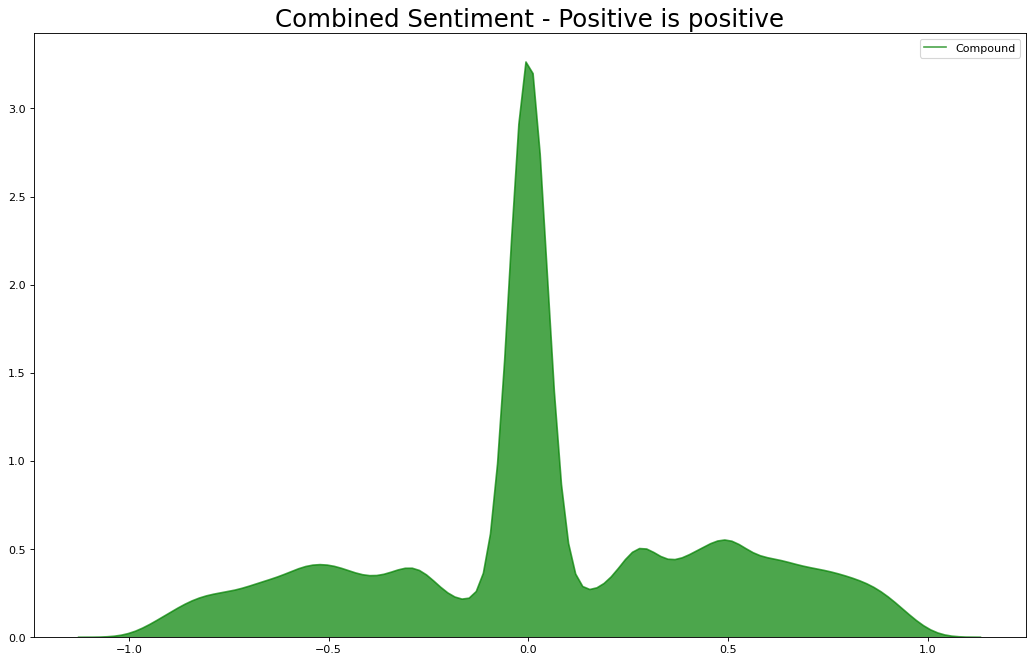

In [224]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(sentence_df['compound'], shade=True, color="g", label="Compound", alpha=.7)
plt.title('Combined Sentiment - Positive is positive', fontsize=22)
plt.legend()
plt.show()

In [225]:
negative_df.head(15)

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short,neg,neu,...,compound,AlexMarker,compound_cut,pos_cut,neg_cut,neu_cut,compound_qcut,pos_qcut,neg_qcut,neu_qcut
570,Fear not.,9,2,3.000000,1,1,0,fear,0.762,0.238,...,-0.4939,Negative,"(-0.591, -0.393]","(-0.001, 0.1]","(0.7, 0.8]","(0.2, 0.3]","(-0.557, -0.296]","(-0.001, 0.061]","(0.193, 1.0]","(-0.001, 0.676]"
655,Bury your dead.,15,3,3.750000,1,1,0,bury dead,0.683,0.317,...,-0.6486,Negative,"(-0.789, -0.591]","(-0.001, 0.1]","(0.6, 0.7]","(0.3, 0.4]","(-0.988, -0.557]","(-0.001, 0.061]","(0.193, 1.0]","(-0.001, 0.676]"
662,Bury therefore your dead.,25,4,5.000000,1,1,0,bury dead,0.589,0.411,...,-0.6486,Negative,"(-0.789, -0.591]","(-0.001, 0.1]","(0.5, 0.6]","(0.4, 0.5]","(-0.988, -0.557]","(-0.001, 0.061]","(0.193, 1.0]","(-0.001, 0.676]"
1839,"Do you intend to kill me, as you killed the Eg...",53,11,4.416667,2,2,0,intend kill kill Egyptian,0.505,0.495,...,-0.8807,Negative,"(-0.989, -0.789]","(-0.001, 0.1]","(0.5, 0.6]","(0.4, 0.5]","(-0.988, -0.557]","(-0.001, 0.061]","(0.193, 1.0]","(-0.001, 0.676]"
6311,You don't love me.,18,4,3.600000,2,1,0,love,0.529,0.471,...,-0.5216,Negative,"(-0.591, -0.393]","(-0.001, 0.1]","(0.5, 0.6]","(0.4, 0.5]","(-0.557, -0.296]","(-0.001, 0.061]","(0.193, 1.0]","(-0.001, 0.676]"
6790,4:8 Woe to us!,14,4,2.800000,2,1,0,4:8 woe,0.508,0.492,...,-0.4753,Negative,"(-0.591, -0.393]","(-0.001, 0.1]","(0.5, 0.6]","(0.4, 0.5]","(-0.557, -0.296]","(-0.001, 0.061]","(0.193, 1.0]","(-0.001, 0.676]"
6987,whom have I oppressed?,22,4,4.400000,1,1,1,oppress,0.608,0.392,...,-0.4767,Negative,"(-0.591, -0.393]","(-0.001, 0.1]","(0.6, 0.7]","(0.3, 0.4]","(-0.557, -0.296]","(-0.001, 0.061]","(0.193, 1.0]","(-0.001, 0.676]"
7480,"after a dead dog, after a flea.",31,7,3.875000,2,0,0,dead dog flea,0.518,0.482,...,-0.6486,Negative,"(-0.789, -0.591]","(-0.001, 0.1]","(0.5, 0.6]","(0.4, 0.5]","(-0.988, -0.557]","(-0.001, 0.061]","(0.193, 1.0]","(-0.001, 0.676]"
7719,"1:27 How are the mighty fallen, and the weapon...",64,12,4.923077,3,1,0,1:27 mighty fall weapon war perish,0.516,0.484,...,-0.8622,Negative,"(-0.989, -0.789]","(-0.001, 0.1]","(0.5, 0.6]","(0.4, 0.5]","(-0.988, -0.557]","(-0.001, 0.061]","(0.193, 1.0]","(-0.001, 0.676]"
9822,Treason!,8,1,4.000000,1,1,0,Treason,1.000,0.000,...,-0.4926,Negative,"(-0.591, -0.393]","(-0.001, 0.1]","(0.9, 1.0]","(-0.001, 0.1]","(-0.557, -0.296]","(-0.001, 0.061]","(0.193, 1.0]","(-0.001, 0.676]"


In [226]:
#positive_df.sample(5)

plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(negative_df['compound'], shade=True, color="g", label="Compound", alpha=.9)
sns.kdeplot(negative_df['pos'], shade=True, color="deeppink", label="Positive", alpha=.7)
sns.kdeplot(negative_df['neg'], shade=True, color="dodgerblue", label="Negative", alpha=.7)
sns.kdeplot(negative_df['neu'], shade=True, color="orange", label="Neutral", alpha=.7)
plt.title('Negative only Sentiment - Positive is positive', fontsize=22)
plt.legend()
plt.show()

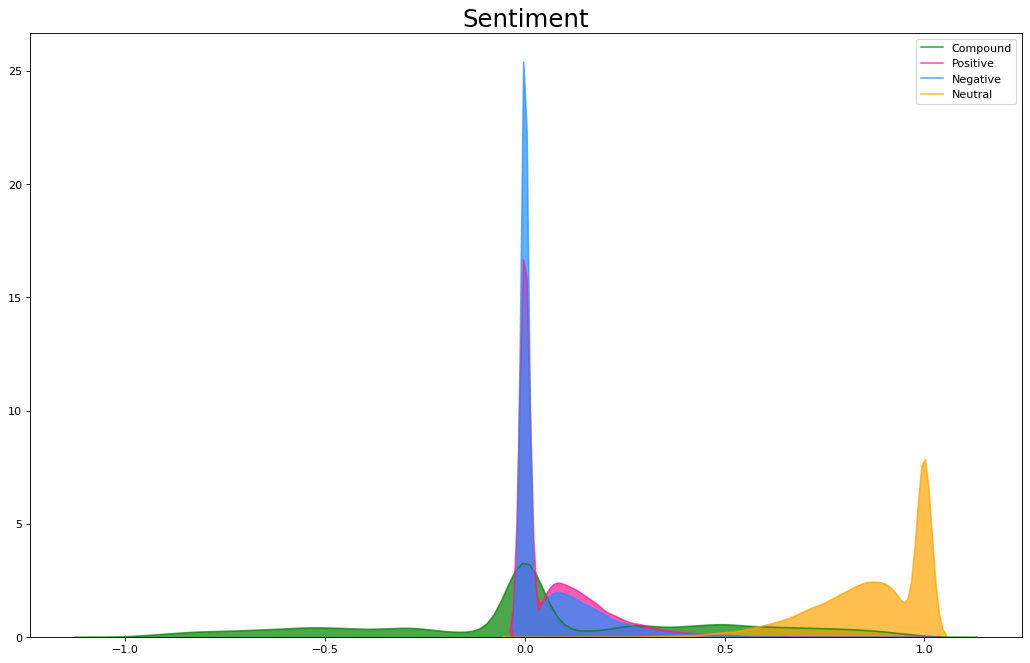

In [227]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(sentence_df['compound'], shade=True, color="g", label="Compound", alpha=.7)
sns.kdeplot(sentence_df['pos'], shade=True, color="deeppink", label="Positive", alpha=.7)
sns.kdeplot(sentence_df['neg'], shade=True, color="dodgerblue", label="Negative", alpha=.7)
sns.kdeplot(sentence_df['neu'], shade=True, color="orange", label="Neutral", alpha=.7)

# Decoration
plt.title('Sentiment', fontsize=22)
plt.legend()
plt.show()

plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(sentence_df['compound'].sentence_df['AlexMarker'] =="neu", shade=True, color="g", label="Compound", alpha=.7)
#sns.kdeplot(sentence_df['pos'], shade=True, color="deeppink", label="Positive", alpha=.7)
#sns.kdeplot(sentence_df['neg'], shade=True, color="dodgerblue", label="Negative", alpha=.7)
#sns.kdeplot(sentence_df['neu'], shade=True, color="orange", label="Neutral", alpha=.7)


In [228]:
results_df['AlexMarker'].value_counts()

Neutral     31082
Positive      185
Negative      116
Name: AlexMarker, dtype: int64

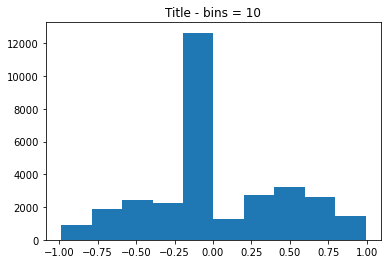

In [229]:
import matplotlib.pyplot as plt
num_bins = 10
plt.title('Title - bins = 10')
plt.hist(results_df['compound'], bins =num_bins)
plt.show()



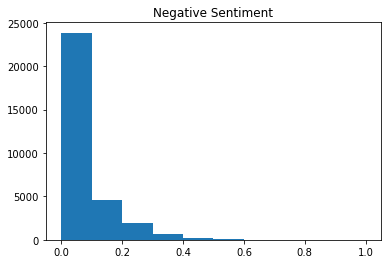

In [230]:
import matplotlib.pyplot as plt
num_bins = 10
plt.title('Negative Sentiment')
plt.hist(results_df['neg'], bins =num_bins)
plt.show()

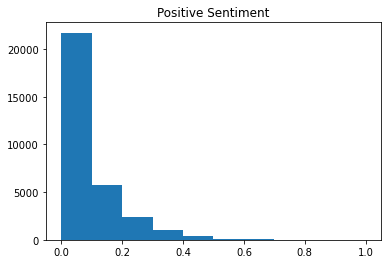

In [231]:
import matplotlib.pyplot as plt
num_bins = 10
plt.title('Positive Sentiment')
plt.hist(results_df['pos'], bins =num_bins)
plt.show()

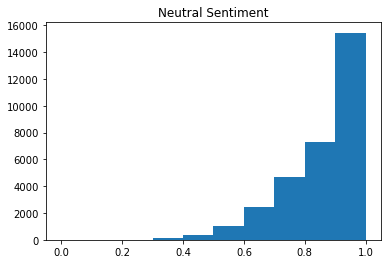

In [232]:
import matplotlib.pyplot as plt
num_bins = 10
plt.title('Neutral Sentiment')
plt.hist(results_df['neu'], bins =num_bins)
plt.show()

In [233]:
import seaborn as sns

C:\Users\alexd\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\alexd\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\alexd\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\alexd\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\alexd\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\alexd\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

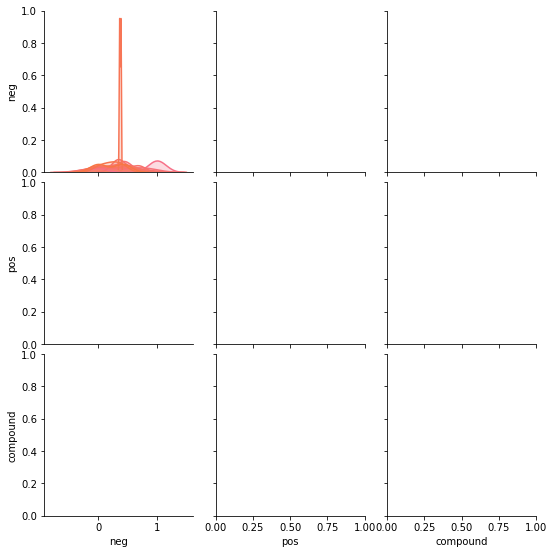

In [234]:
g = sns.pairplot(results_df, hue="neu")

# add Word Cloud
* https://www.geeksforgeeks.org/generating-word-cloud-python/
* https://amueller.github.io/word_cloud/auto_examples/simple.html

In [ ]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/

In [235]:
wordcloudb = WordCloud(background_color="white").generate(my_text)

(-0.5, 399.5, 199.5, -0.5)

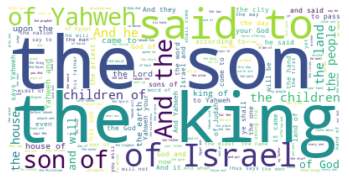

In [236]:
plt.imshow(wordcloudb, interpolation='bilinear')
plt.axis("off")

In [237]:
#mask = np.array(Image.open(path.join(d, "alice_mask.png")))

# Multiple Word counts
* https://stackoverflow.com/questions/61218518/count-frequency-of-multi-word-terms-in-large-texts-with-python
* https://www.daniweb.com/programming/software-development/threads/292323/counting-phrases

In [238]:
def group_text2(text, group_size):
    """
    groups a text into text groups set by group_size
    returns a list of grouped strings
    """
    word_list = text.split()
    group_list = []
    for k in range(len(word_list)):
        start = k
        end = k + group_size
        group_slice = word_list[start: end]
        # append only groups of proper length/size
        if len(group_slice) == group_size:
            group_list.append(" ".join(group_slice))
            #GS.append(" ".join(group_slice))
    return (group_list)

In [239]:
sentence_df.shape


(31383, 21)

In [240]:
sentence_df.head()

,Sentence,sentence_length,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,short,neg,neu,...,compound,AlexMarker,compound_cut,pos_cut,neg_cut,neu_cut,compound_qcut,pos_qcut,neg_qcut,neu_qcut
0,The Revelation of John\n\nThe General Epistle ...,2807,455,6.155702,45,307,2,Revelation John \n\n General Epistle Jude \n\n...,0.012,0.985,...,-0.5583,Neutral,"(-0.591, -0.393]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(-0.988, -0.557]","(-0.001, 0.061]","(-0.001, 0.069]","(0.942, 1.0]"
1,http://bit.ly/PrintPostWS \n\n\n\nThe Old Test...,354,55,6.321429,20,20,3,http://bit.ly/PrintPostWS \n\n\n\n Old Testame...,0.000,0.957,...,0.3182,Neutral,"(0.201, 0.399]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(0.273, 0.452]","(-0.001, 0.061]","(-0.001, 0.069]","(0.942, 1.0]"
2,(Until the rest are completed by David Robert ...,76,13,5.428571,2,4,0,rest complete David Robert Palmer translation,0.000,1.000,...,0.0000,Neutral,"(-0.195, 0.0027]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(-0.296, 0.0]","(-0.001, 0.061]","(-0.001, 0.069]","(0.942, 1.0]"
3,Acts is in progress.),21,4,4.200000,2,1,0,act progress,0.000,1.000,...,0.0000,Neutral,"(-0.195, 0.0027]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(-0.296, 0.0]","(-0.001, 0.061]","(-0.001, 0.069]","(0.942, 1.0]"
4,To download an edition of just the fresh trans...,525,62,8.333333,36,14,1,download edition fresh translation part David ...,0.000,0.964,...,0.3182,Neutral,"(0.201, 0.399]","(-0.001, 0.1]","(-0.001, 0.1]","(0.9, 1.0]","(0.273, 0.452]","(-0.001, 0.061]","(-0.001, 0.069]","(0.942, 1.0]"


In [241]:
#text = "I love you very much so very much"
#text = sentence_df['Sentence'][1]
text = my_text

In [242]:
#print(text)

In [243]:
# Now this
Grouped_Words8=[]
for group_size in range(3,50,1):
    #group_size = 4
    #group_list = group_text2(text, group_size)
    word_list = text.split()
    group_list = []
    for k in range(len(word_list)):
        start = k
        end = k + group_size
        group_slice = word_list[start: end]
    
        group_slice_joined= (" ".join(group_slice))
  
    
        # append only groups of proper length/size
        if len(group_slice) == group_size:

            Grouped_Words8 += [group_slice_joined] #test_list += [test_str] 
# convert list to set to avoid duplicates
#print(group_list)
group_set = set(group_list)
#Grouped_Words.append(group_set)
#Grouped_Words.append(group_list)

In [244]:
#print(Grouped_Words8)

In [245]:
Grouped_Words_df = pd.DataFrame(Grouped_Words8, columns=['phrases'])

In [246]:
#Grouped_Words_df['word_count'] = Grouped_Words_df['phrases'].apply(lambda x: len(x.split()))

In [247]:
Grouped_Words_df.head()

,phrases
0,The Revelation of
1,Revelation of John
2,of John The
3,John The General
4,The General Epistle


In [248]:
Grouped_Words_more_than_one = Grouped_Words_df['phrases'].value_counts()

In [249]:
print(Grouped_Words_more_than_one)

the son of                                                                                                                                                                                                                 1286
the children of                                                                                                                                                                                                            1274
the house of                                                                                                                                                                                                                816
out of the                                                                                                                                                                                                                  730
the land of                                                                                             

In [250]:
type(Grouped_Words_more_than_one)

pandas.core.series.Series

In [251]:
Grouped_Words_more_than_one.columns = ['phrase', 'count']

In [252]:
Grouped_Words_more_than_one.head()

the son of         1286
the children of    1274
the house of        816
out of the          730
the land of         611
Name: phrases, dtype: int64

In [253]:
Grouped_Words_more_than_one_df = pd.DataFrame(Grouped_Words_more_than_one).reset_index()

In [254]:
Grouped_Words_more_than_one_df.head()

,index,phrases
0,the son of,1286
1,the children of,1274
2,the house of,816
3,out of the,730
4,the land of,611


In [255]:
Grouped_Words_more_than_one_df.columns = ['phrase', 'count']

In [256]:
Grouped_Words_more_than_one_df.head()

,phrase,count
0,the son of,1286
1,the children of,1274
2,the house of,816
3,out of the,730
4,the land of,611


In [257]:
Grouped_Words_more_than_one_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37899724 entries, 0 to 37899723
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   phrase  object
 1   count   int64 
dtypes: int64(1), object(1)
memory usage: 578.3+ MB


In [258]:
GW_short= Grouped_Words_more_than_one_df[Grouped_Words_more_than_one_df['count'] > 1 ]

In [259]:
GW_short.head()

,phrase,count
0,the son of,1286
1,the children of,1274
2,the house of,816
3,out of the,730
4,the land of,611


In [260]:
#GW_short.reset_index()

In [261]:
#GW_short = GW_short.rename(columns={'index': 'phrase', 'phrases': 'count'})

In [262]:
GW_short.head()

,phrase,count
0,the son of,1286
1,the children of,1274
2,the house of,816
3,out of the,730
4,the land of,611


In [263]:
GW_short['word_count'] = GW_short['phrase'].apply(lambda x: len(x.split()))

C:\Users\alexd\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [264]:
GW_short['word_count'].value_counts()

3     85728
4     61092
5     40734
6     28433
7     21105
8     16352
9     13051
10    10595
11     8738
12     7277
13     6100
14     5155
15     4378
16     3724
17     3167
18     2698
19     2310
20     1981
21     1709
22     1480
23     1280
24     1112
25      965
26      833
27      719
28      619
29      532
30      460
31      399
32      347
33      303
34      266
35      235
36      210
37      186
38      165
39      148
40      131
41      116
42      103
43       92
44       82
45       72
46       63
47       57
48       51
49       46
Name: word_count, dtype: int64

In [265]:
GW3 = GW_short[GW_short['word_count'] == 3 ]
GW3.head(10)

,phrase,count,word_count
0,the son of,1286,3
1,the children of,1274,3
2,the house of,816,3
3,out of the,730,3
4,the land of,611,3
5,the sons of,530,3
6,and I will,511,3
7,the king of,446,3
8,"said to him,",423,3
9,and all the,422,3


In [266]:
GW4 = GW_short[GW_short['word_count'] == 4 ]
GW4.head(10)

,phrase,count,word_count
14,of the children of,356,4
18,And it came to,327,4
20,the children of Israel,320,4
31,in the midst of,233,4
38,of the house of,211,4
41,in the land of,209,4
42,"it came to pass,",208,4
49,"Yahweh, the God of",199,4
54,it came to pass,181,4
57,"the children of Israel,",175,4


In [267]:
GW5 = GW_short[GW_short['word_count'] == 5 ]
GW5.head(10)

,phrase,count,word_count
60,"And it came to pass,",170,5
71,And it came to pass,157,5
100,"it came to pass, when",135,5
177,out of the land of,100,5
207,And it shall come to,91,5
225,"Yahweh, the God of Israel,",88,5
230,in the midst of the,86,5
242,word of Yahweh came to,83,5
243,the word of Yahweh came,82,5
280,"And Yahweh spoke to Moses,",76,5


In [268]:
GW6 = GW_short[GW_short['word_count'] == 6 ]
GW6.head()

,phrase,count,word_count
140,"And it came to pass, when",115,6
260,the word of Yahweh came to,79,6
307,"And Yahweh spoke to Moses, saying,",72,6
582,"of Yahweh came to me, saying,",50,6
586,"And it shall come to pass,",50,6


In [269]:
GW9 = GW_short[GW_short['word_count'] == 9 ]

In [270]:
GW9.shape

(13051, 3)

In [271]:
GW9

,phrase,count,word_count
906,did that which was evil in the sight of,40,9
1142,http://bibletranslation.ws/palmer-translation/...,34,9
1149,in the book of the chronicles of the kings,34,9
1184,the book of the chronicles of the kings of,34,9
1210,written in the book of the chronicles of the,34,9
...,...,...,...
335270,"still speaking, there came also another, and s...",2,9
335296,"And it came to pass after a while, that",2,9
335298,gold in the two rings at the ends of,2,9
335366,"you a decree to build this house, and to",2,9


In [272]:
GW24 = GW_short[GW_short['word_count'] == 24 ]
GW24

,phrase,count,word_count
6080,"one silver bowl of seventy shekels, after the ...",12,24
6718,"thirty shekels, one silver bowl of seventy she...",12,24
6780,"silver bowl of seventy shekels, after the shek...",12,24
6824,"shekels, one silver bowl of seventy shekels, a...",12,24
6909,"bowl of seventy shekels, after the shekel of t...",12,24
...,...,...,...
334392,"master, Thus says Yahweh, Be not afraid of the...",2,24
334425,"to him, Thus says Hezekiah, This day is a day ...",2,24
334775,"you not heard how I have done it long ago, and...",2,24
334823,"had said this, he showed them his hands and hi...",2,24


In [273]:
GW25 = GW_short[GW_short['word_count'] == 25 ]
GW25

,phrase,count,word_count
5814,"thirty shekels, one silver bowl of seventy she...",12,25
5977,"shekels, one silver bowl of seventy shekels, a...",12,25
6750,"silver bowl of seventy shekels, after the shek...",12,25
7052,"one silver bowl of seventy shekels, after the ...",12,25
7335,the weight whereof was a hundred and thirty sh...,11,25
...,...,...,...
334106,"up, and there is no rain, because they have si...",2,25
334158,and they shall beat their swords into plowshar...,2,25
334302,"words of Rabshakeh, whom the king of Assyria h...",2,25
335015,"when he utters his voice, there is a tumult of...",2,25


In [274]:
sentence_df.to_csv('C:/Users/alexd/Alex Folder 1/NLP Project1/sentence_df.csv')

In [275]:
#!pip install pyspellchecker

# Spelling

In [276]:
from spellchecker import SpellChecker

In [277]:
# from https://pypi.org/project/pyspellchecker/#:~:text=Utilities-,Project%20description,2%20from%20the%20original%20word.

spell = SpellChecker()  # loads default word frequency list
spell.word_frequency.load_text_file('my_text')


In [278]:
print(spell.word_frequency)

In [279]:
print(words)

['http', ':', '//bibletranslation.ws/palmer-translation/', 'http', ':', '//bibletranslation.ws/palmer-translation/', 'http', ':', '//bibletranslation.ws/palmer-translation/', 'http', ':', '//bibletranslation.ws/palmer-translation/', 'http', ':', '//bibletranslation.ws/palmer-translation/', 'http', ':', '//bibletranslation.ws/palmer-translation/', 'http', ':', '//bibletranslation.ws/palmer-translation/', 'http', ':', '//bibletranslation.ws/palmer-translation/', 'http', ':', '//bibletranslation.ws/palmer-translation/', 'http', ':', '//bibletranslation.ws/palmer-translation/', 'http', ':', '//bibletranslation.ws/palmer-translation/', 'http', ':', '//bibletranslation.ws/palmer-translation/', 'http', ':', '//bibletranslation.ws/palmer-translation/', 'http', ':', '//bibletranslation.ws/palmer-translation/', 'http', ':', '//bibletranslation.ws/palmer-translation/', 'http', ':', '//bibletranslation.ws/palmer-translation/', 'http', ':', '//bibletranslation.ws/palmer-translation/', 'http', ':', 

In [280]:
# from https://www.tutorialspoint.com/python_text_processing/python_spelling_check.htm

In [281]:
misspelled_words = spell.unknown(words2)  # words  # words2 # stripped


In [282]:
misspelled_words_df = pd.DataFrame(misspelled_words,columns=['Words'])

In [283]:
#print(words2)

In [284]:
print(misspelled_words)

{'9so', 'reaiah', '14leave', '45then', '', 'enaim', '22adultery', '2they', '41stay', 'τοῦδε', '21to', '46who', 'maschil', 'sithri', '13took', '24god', 'evangelizing', '22blessed', 'succor', 'sojourner', 'pathros', 'godlessly', 'jorah', 'caldrons', 'selah', '13so', '28thomas', 'revellings', 'revealer', '51he', '22the', 'iob', 'zabdiel', '29his', 'sansannah', 'mizpah', 'benjamites', 'jebusite', '54therefore', '30so', '18by', 'betroth', 'tav', '26yet', 'anathothite', 'izrahite', 'lehem', 'agagite', 'ἀναγνώσματος', '9in', 'hosha', 'bidkar', 'ephrathah', 'arelites', 'millo', 'hashem', 'ahiram', 'talitha', 'shema', 'ishbibenob', 'winevat', 'migdol', 'harashim', '40jesus', 'jacan', '28so', 'ramoth', 'adullamite', '13annulling', 'surnamed', 'elohe', 'gallim', 'adah', '5his', 'wearies', 'addi', 'archites', 'milch', '39there', 'kohathites', 'canneh', '4who', 'jephthah', 'jewdom', 'thebez', 'lahad', 'jether', 'victualled', '18zechariah', 'anakim', 'mene', 'puteoli', 'hazzebaim', '22judas', 'harod

In [285]:
spell.known(misspelled_words)

set()

# Blob
https://textblob.readthedocs.io/en/dev/

In [286]:

from textblob import TextBlob

In [287]:
text = my_text

In [288]:
blob = TextBlob(text)

In [289]:

#blob.tags      




blob.noun_phrases   # WordList(['titular threat', 'blob',
                    #            'ultimate movie monster',


                    #            'amoeba-like mass', ...])

for sentence in blob.sentences:
    print(sentence.sentiment.polarity)


# Spelling PArt 2

In [290]:
# from https://textblob.readthedocs.io/en/dev/quickstart.html#part-of-speech-tagging
b = TextBlob("burlap") #misspelled_words)
print(b, " is incorrect and correct is: " ,b.correct())


burlap  is incorrect and correct is:  bursa


In [291]:
misspelled_words_df.head()

,Words
0,9so
1,reaiah
2,14leave
3,45then
4,


In [292]:
for i in misspelled_words_df: #range (len (misspelled_words_df)):
    temp = misspelled_words_df[i]
    str_temp= str(temp)
    bword  = TextBlob(str_temp)
    correct = bword.correct()

In [293]:
 print(bword, " is incorrent and correct is: ", correct) # ,b.correct())

0                 9so
1              reaiah
2             14leave
3              45then
4                    
            ...      
4908        intructed
4909    moneychangers
4910           asahel
4911          shemite
4912          ahasbai
Name: Words, Length: 4913, dtype: object  is incorrent and correct is:  0                 so
1              reach
2             leave
3              then
4                    
            ...      
4908        instructed
4909    moneychangers
4910           ashes
4911          smite
4912          ahasbai
Same: Words, Length: 4913, type: object


In [294]:
 print(bword, " is incorrent and correct is: ", b.correct())

0                 9so
1              reaiah
2             14leave
3              45then
4                    
            ...      
4908        intructed
4909    moneychangers
4910           asahel
4911          shemite
4912          ahasbai
Name: Words, Length: 4913, dtype: object  is incorrent and correct is:  bursa
